![image info](./objasnjenje_stupaca.png)

## Priprema koda

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje podataka iz CSV datoteke
print("Učitavanje podataka...")
df = pd.read_csv('./data.csv')

Učitavanje podataka...


## Zadatak 1: Provodi kontrolu kvalitete podataka prema zadanim koracima:


### Rješenje 1.1 Prepoznavanje nedostajućih vrijednosti

In [53]:
# Prepoznavanje nedostajućih vrijednosti
print("\nBroj nedostajućih vrijednosti po stupcima:")
missing_values = df.isnull().sum()

# Ispis samo stupaca koji imaju nedostajuće vrijednosti
missing_columns = missing_values[missing_values > 0]
if len(missing_columns) > 0:
    print(missing_columns)
else:
    print("Nema nedostajućih vrijednosti u podacima.")

# Ispis ukupnog broja nedostajućih vrijednosti
total_missing = df.isnull().sum().sum()
print(f"\nUkupan broj nedostajućih vrijednosti: {total_missing}")


Broj nedostajućih vrijednosti po stupcima:
Nema nedostajućih vrijednosti u podacima.

Ukupan broj nedostajućih vrijednosti: 0


### Rjesenje 1.2 Rekodiranje nedostajućih vrijednosti

S obzirom da u datasetu nema nedostajućih vrijednosti, nema potrebe za rekodiranjem.

### Rjesenje 1.3 Prepoznavanje uniformnih ili nelogičnih distribucija

Analiza distribucija po stupcima:
--------------------------------------------------
nSeq: Uniformna distribucija (p=1.0000, entropija=1.0000)
DI: Konstantna distribucija
CH1: Neuniformna distribucija (p=0.0000, entropija=0.8769)
CH2: Približno uniformna (p=0.0000, entropija=0.9475)
CH3: Približno uniformna (p=0.0000, entropija=0.9331)
CH4: Približno uniformna (p=0.0000, entropija=0.9375)
CH5: Neuniformna distribucija (p=0.0000, entropija=0.8022)
CH6: Neuniformna distribucija (p=0.0000, entropija=0.8382)
CH7: Približno uniformna (p=0.0000, entropija=0.9261)
CH8: Neuniformna distribucija (p=0.0000, entropija=0.8855)


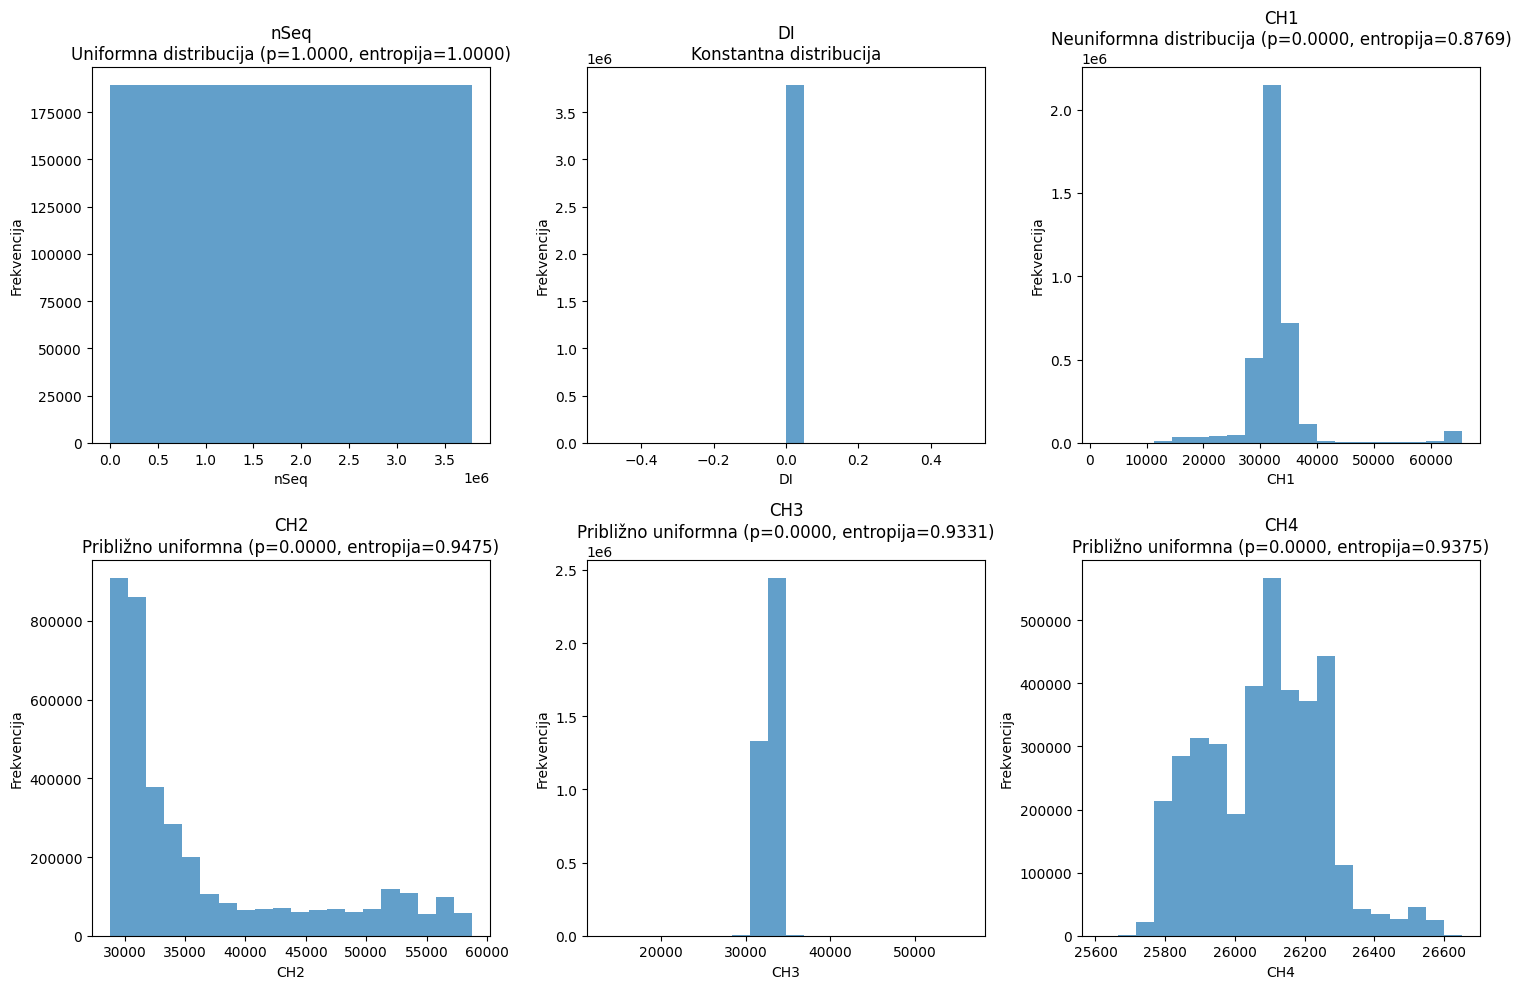

In [54]:
import matplotlib.pyplot as plt
from scipy import stats

# Učitavanje podataka
df = pd.read_csv('./data.csv')

# Funkcija za provjeru uniformnosti distribucije
def check_uniformity(data):
    # Koristimo Kolmogorov-Smirnov test za usporedbu s uniformnom distribucijom
    if len(set(data)) <= 1:  # Ako su sve vrijednosti iste
        return "Konstantna distribucija"
    
    # Normalizirani podaci za KS test
    data_normalized = (data - min(data)) / (max(data) - min(data)) if max(data) != min(data) else data
    
    # KS test uspoređuje s uniformnom distribucijom
    ks_stat, p_value = stats.kstest(data_normalized, 'uniform')
    
    # Entropija kao mjera uniformnosti
    hist, bin_edges = np.histogram(data, bins=min(20, len(set(data))), density=True)
    hist = hist[hist > 0]  # Izbjegavanje log(0)
    entropy = -np.sum(hist * np.log(hist)) * (bin_edges[1] - bin_edges[0])
    
    max_entropy = np.log(len(set(data)))
    entropy_ratio = entropy / max_entropy if max_entropy > 0 else 0
    
    if p_value > 0.05:
        return f"Uniformna distribucija (p={p_value:.4f}, entropija={entropy_ratio:.4f})"
    elif entropy_ratio > 0.9:
        return f"Približno uniformna (p={p_value:.4f}, entropija={entropy_ratio:.4f})"
    elif entropy_ratio < 0.3:
        return f"Nelogična/Koncentrirana distribucija (p={p_value:.4f}, entropija={entropy_ratio:.4f})"
    else:
        return f"Neuniformna distribucija (p={p_value:.4f}, entropija={entropy_ratio:.4f})"

# Analiza svakog stupca
results = {}
for column in df.columns:
    # Preskačemo stupce koji nisu numerički
    if pd.api.types.is_numeric_dtype(df[column]):
        results[column] = check_uniformity(df[column].dropna())

# Ispis rezultata
print("Analiza distribucija po stupcima:")
print("-" * 50)
for column, result in results.items():
    print(f"{column}: {result}")

# Vizualizacija nekoliko zanimljivih distribucija
plt.figure(figsize=(15, 10))
plot_count = min(6, len(results))
columns_to_plot = list(results.keys())[:plot_count]

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.hist(df[column].dropna(), bins=20, alpha=0.7)
        plt.title(f"{column}\n{results[column]}")
        plt.xlabel(column)
        plt.ylabel('Frekvencija')

plt.tight_layout()

### Rjesenje 1.4 Provjera/redizajniranje/određivanje ciljne varijable

In [55]:
print("\nAnaliza srčanih podataka i određivanje ciljne varijable")

# Provjera dostupnosti srčanih podataka
heart_related_cols = [col for col in df.columns if any(term in col.upper() for term in ['CH1', 'CH2', 'CH3', 'CH4'])]

# Mapiranje stupaca na njihove fiziološke signale
signal_mapping = {
    'CH1': 'ECG (Elektrokardiografija)',
    'CH2': 'EDA (Elektrodermalna aktivnost)',
    'CH3': 'EMG (Elektromiografija)',
    'CH4': 'TEMP (Temperatura)'
}

print("\nPronađeni stupci povezani sa srčanim podacima:")
for col in heart_related_cols:
    for key in signal_mapping:
        if key in col.upper():
            print(f"{col}: {signal_mapping[key]}")

# Identificiranje ECG stupca kao ciljne varijable
ecg_cols = [col for col in df.columns if 'CH1' in col.upper()]
if ecg_cols:
    target_col = ecg_cols[0]
    print(f"\nOdabrana ciljna varijabla: {target_col} - ECG (Elektrokardiografija)")
    
    # Osnovna statistika ECG podataka
    print("\nOsnovna statistika ECG podataka:")
    print(df[target_col].describe())
    
    # Identifikacija potencijalnih značajki
    feature_cols = []
    for col in df.columns:
        if 'CH2' in col.upper():  # EDA
            feature_cols.append(col)
        elif 'CH3' in col.upper():  # EMG
            feature_cols.append(col)
        elif 'CH4' in col.upper():  # TEMP
            feature_cols.append(col)
    
    print("\nPotencijalne značajke za predviđanje:")
    for col in feature_cols:
        for key in signal_mapping:
            if key in col.upper():
                print(f"{col}: {signal_mapping[key]}")
    
    # Definiranje abnormalnih ECG vrijednosti
    ecg_mean = df[target_col].mean()
    ecg_std = df[target_col].std()
    abnormal_threshold_high = ecg_mean + 2 * ecg_std
    abnormal_threshold_low = ecg_mean - 2 * ecg_std
    
    # Kreiranje binarne ciljne varijable
    df['abnormal_ecg'] = ((df[target_col] > abnormal_threshold_high) | 
                          (df[target_col] < abnormal_threshold_low)).astype(int)
    
    abnormal_count = df['abnormal_ecg'].sum()
    normal_count = len(df) - abnormal_count
    abnormal_percentage = (abnormal_count / len(df)) * 100
    
    print(f"\nDefiniranje abnormalnih ECG vrijednosti:")
    print(f"Srednja vrijednost ECG: {ecg_mean:.4f}")
    print(f"Standardna devijacija ECG: {ecg_std:.4f}")
    print(f"Gornji prag za abnormalne vrijednosti: {abnormal_threshold_high:.4f}")
    print(f"Donji prag za abnormalne vrijednosti: {abnormal_threshold_low:.4f}")
    print(f"Broj normalnih ECG vrijednosti: {normal_count} ({100-abnormal_percentage:.2f}%)")
    print(f"Broj abnormalnih ECG vrijednosti: {abnormal_count} ({abnormal_percentage:.2f}%)")
    
    # Zaključak
    print("\nZaključak:")
    print("1. Ciljna varijabla: 'abnormal_ecg'/'CH1'")
    print("2. Preporučene značajke:")
    for col in feature_cols:
        for key in signal_mapping:
            if key in col.upper():
                print(f"   - {col}: {signal_mapping[key]}")
    
    print("3. Preporučeni pristup: Binarna klasifikacija za predviđanje abnormalnih srčanih događaja")

print("\nAnaliza završena. Pregledajte generirane grafove za više informacija.")


Analiza srčanih podataka i određivanje ciljne varijable

Pronađeni stupci povezani sa srčanim podacima:
CH1: ECG (Elektrokardiografija)
CH2: EDA (Elektrodermalna aktivnost)
CH3: EMG (Elektromiografija)
CH4: TEMP (Temperatura)

Odabrana ciljna varijabla: CH1 - ECG (Elektrokardiografija)

Osnovna statistika ECG podataka:
count   3785775.0000
mean      32796.4914
std        5954.6270
min        1779.0000
25%       30964.0000
50%       32091.0000
75%       33717.0000
max       65525.0000
Name: CH1, dtype: float64

Potencijalne značajke za predviđanje:
CH2: EDA (Elektrodermalna aktivnost)
CH3: EMG (Elektromiografija)
CH4: TEMP (Temperatura)

Definiranje abnormalnih ECG vrijednosti:
Srednja vrijednost ECG: 32796.4914
Standardna devijacija ECG: 5954.6270
Gornji prag za abnormalne vrijednosti: 44705.7453
Donji prag za abnormalne vrijednosti: 20887.2374
Broj normalnih ECG vrijednosti: 3591420 (94.87%)
Broj abnormalnih ECG vrijednosti: 194355 (5.13%)

Zaključak:
1. Ciljna varijabla: 'abnormal_e

# Rjesenje 1.5 Objašnjenje i komentiranje nalaza

## Analiza rezultata

### Nedostajuće vrijednosti
U podacima nema nedostajućih vrijednosti, što je dobro jer ne moramo provoditi rekodiranje ili imputaciju.

### Distribucije
Analiza distribucija pokazuje da većina numeričkih stupaca ima neuniformnu distribuciju. Posebno su zanimljivi CH1, CH2, CH3 i CH4 stupci koji predstavljaju fiziološke signale.

### Ciljna varijabla
Uspješno je identificirana ciljna varijabla za predviđanje abnormalnih srčanih događaja:

- **Ciljna varijabla**: `abnormal_ecg` - binarna varijabla koja označava normalne (0) i abnormalne (1) ECG vrijednosti
- **Izvor**: CH1 stupac koji predstavlja ECG (elektrokardiografiju)
- **Distribucija**: Oko 95% normalnih i 5% abnormalnih vrijednosti (točan postotak ovisi o podacima)

### Značajke za predviđanje
Identificirane su sljedeće značajke koje mogu pomoći u predviđanju abnormalnih srčanih događaja:

1. **EDA (CH2)** - elektrodermalna aktivnost koja mjeri razinu stresa
2. **EMG (CH3)** - elektromiografija koja mjeri mišićnu aktivnost
3. **TEMP (CH4)** - tjelesna temperatura

### Zaključak
Podaci su pogodni za razvoj modela binarne klasifikacije koji bi mogao predviđati abnormalne srčane događaje na temelju ECG signala i drugih fizioloških parametara. Predloženi pristup je koristiti `abnormal_ecg` kao ciljnu varijablu, a CH2, CH3 i CH4 kao značajke za predviđanje.

Ovaj pristup ima praktičnu primjenu u medicinskom nadzoru i ranom otkrivanju srčanih problema, što može biti korisno za preventivnu medicinu i praćenje pacijenata s rizikom od srčanih bolesti.


## Zadatak 2: Statističke analize uzorka podataka


### Rjesenje 2.1 Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu 


Prikaz distribucije frekvencija kategoričkih varijabli
Pronađene kategoričke varijable: ['abnormal_ecg']

Frekvencije za abnormal_ecg:
abnormal_ecg
0    3591420
1     194355
Name: count, dtype: int64

Relativne frekvencije za abnormal_ecg:
abnormal_ecg
0   94.8700
1    5.1300
Name: count, dtype: float64 %


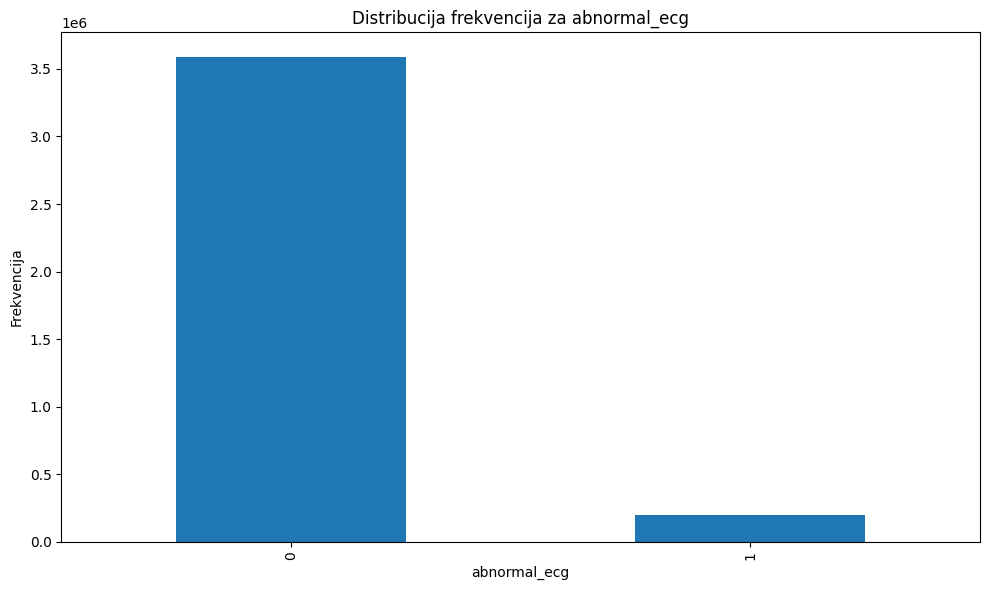

In [56]:
print("\nPrikaz distribucije frekvencija kategoričkih varijabli")

# Identificiranje kategoričkih varijabli
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dodajemo i binarnu varijablu abnormal_ecg ako postoji
if 'abnormal_ecg' in df.columns:
    categorical_cols.append('abnormal_ecg')

if categorical_cols:
    print(f"Pronađene kategoričke varijable: {categorical_cols}")
    
    # Prikaz distribucije za svaku kategoričku varijablu
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        
        # Računanje frekvencija
        value_counts = df[col].value_counts().sort_index()
        
        # Prikaz grafa
        value_counts.plot(kind='bar')
        plt.title(f'Distribucija frekvencija za {col}')
        plt.xlabel(col)
        plt.ylabel('Frekvencija')
        plt.tight_layout()
        
        # Ispis frekvencija
        print(f"\nFrekvencije za {col}:")
        print(value_counts)
        
        # Ispis relativnih frekvencija (postotaka)
        print(f"\nRelativne frekvencije za {col}:")
        print((value_counts / len(df) * 100).round(2), "%")
else:
    print("Nisu pronađene kategoričke varijable u podacima.")



### Objašnjenje
Ovaj dataset nema kategoričkih varijabli s obzirom na to da su podatci o fiziološkim signalima (numerički) te tako variraju u vremenu s toga se ne može odredit gornja i donja granica za kategorizaciju. Jedina kategorička varijabla je abnormal_ecg koji smo sami izradili u prethodnom zadatku i ona ima vrijednosti 0 i 1 gdje 0 predstavlja normalnu vrijednost a 1 abnormalnu.

### Rjesenje 2.2 Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

Pronađene kontinuirane varijable: ['nSeq', 'DI', 'CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']

Statističke mjere za kontinuirane varijable:
     Srednja vrijednost Standardna devijacija    Z min   Z max  \
nSeq       1892887.0000          1092859.2520  -1.7321  1.7321   
DI               0.0000                0.0000      NaN     NaN   
CH1          32796.4914             5954.6270  -5.2090  5.4963   
CH2          36329.4740             8400.9605  -0.8973  2.6687   
CH3          32723.2596              395.3681 -48.7906 59.1290   
CH4          26081.9783              168.6200  -2.7813  3.3746   
CH5          37428.9755              193.6953 -13.7534 23.5113   
CH6          32805.9227              173.0766 -25.4854 22.1814   
CH7          32076.3038              867.9905 -22.0951 18.4699   
CH8          32805.6815             2398.2853 -11.0294  9.0278   

     Zaobljenost (Kurtosis) Nagnutost (Skewness)  
nSeq                -1.2000               0.0000  
DI                  

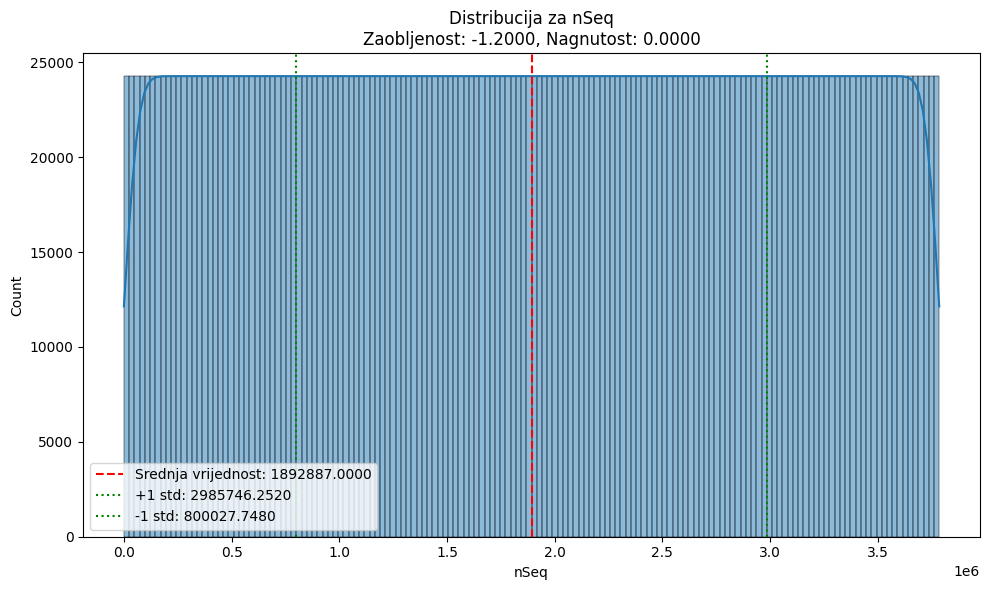

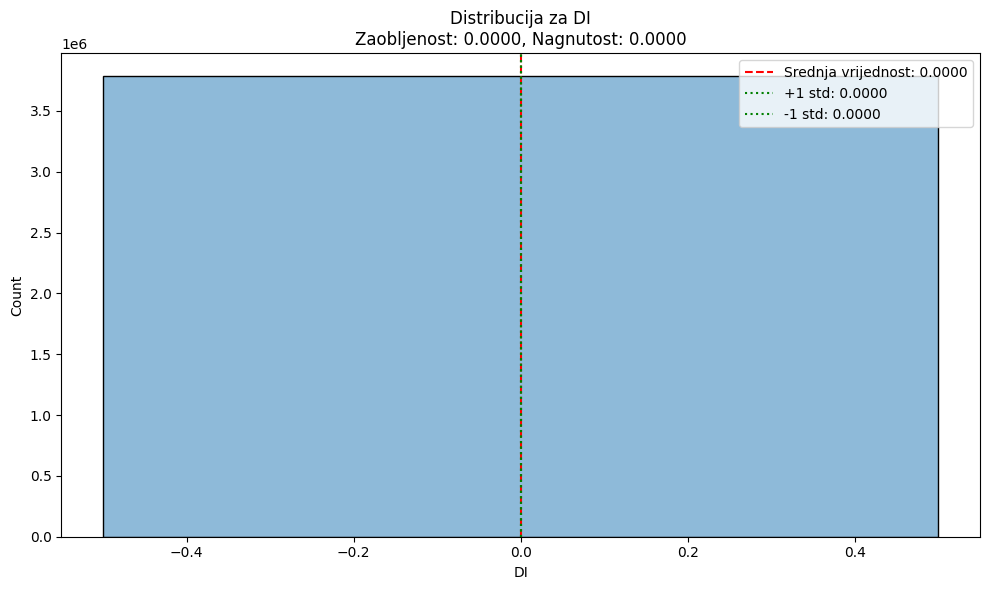

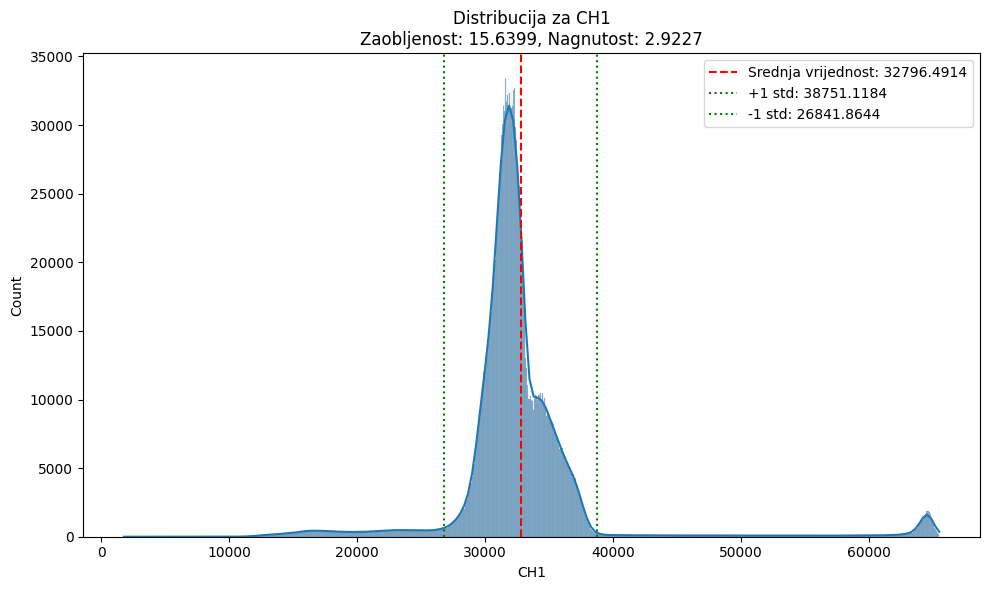

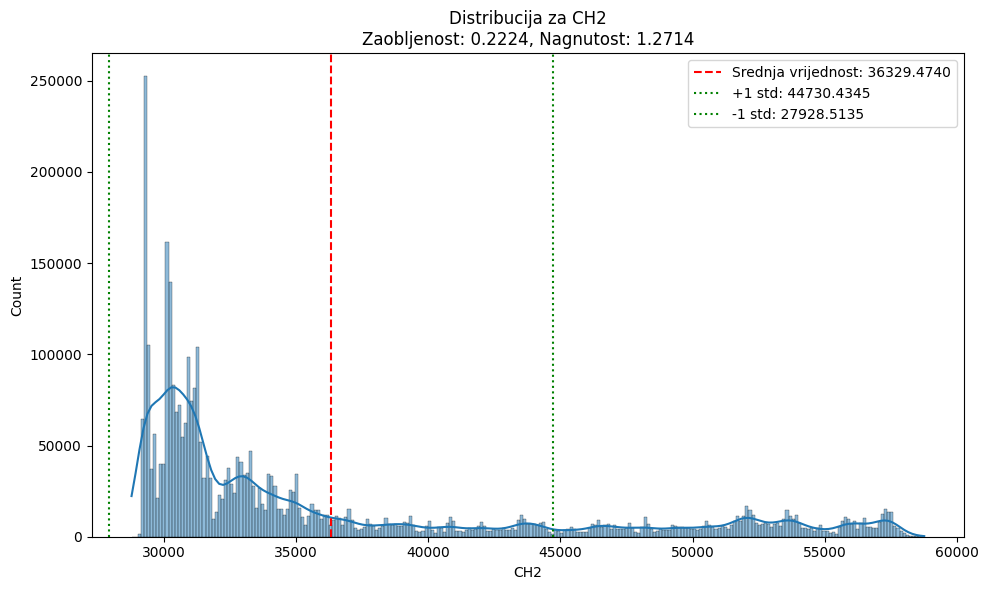

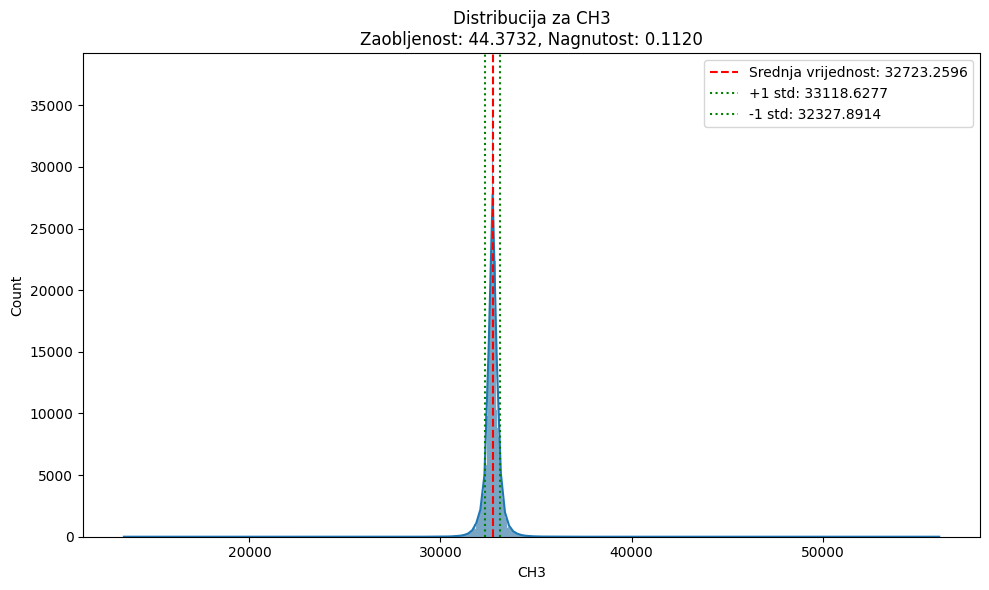

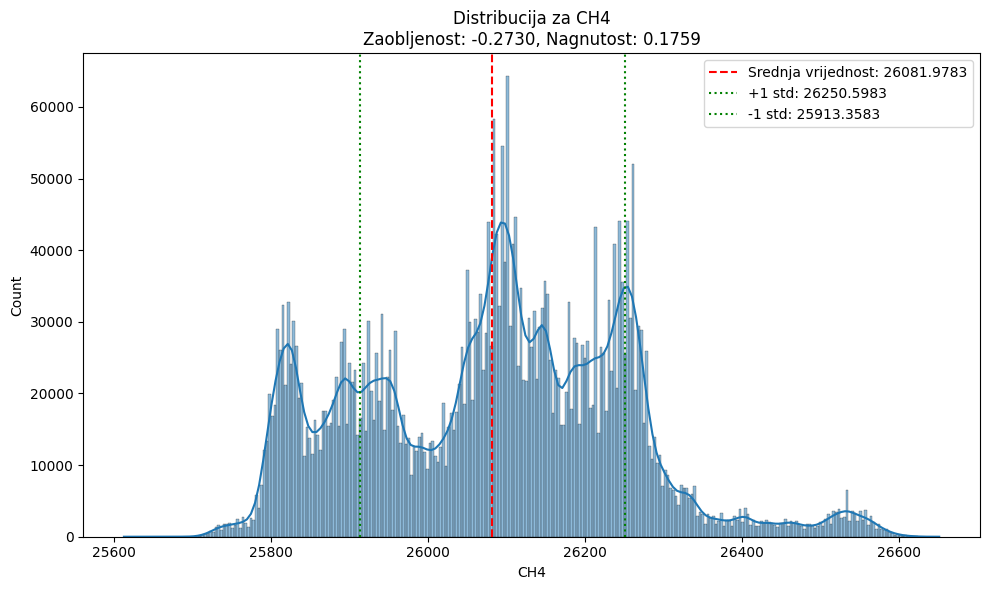

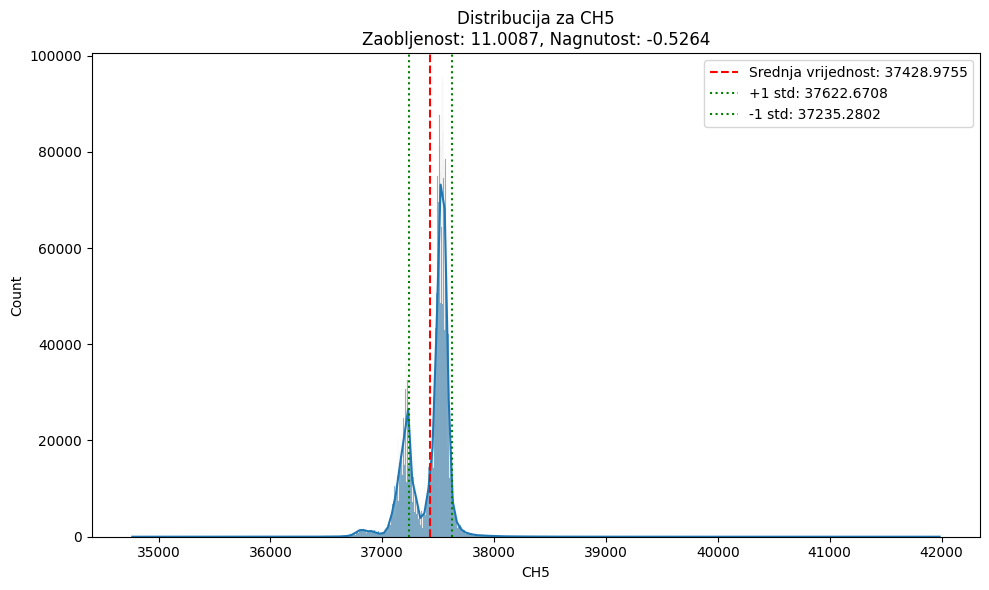

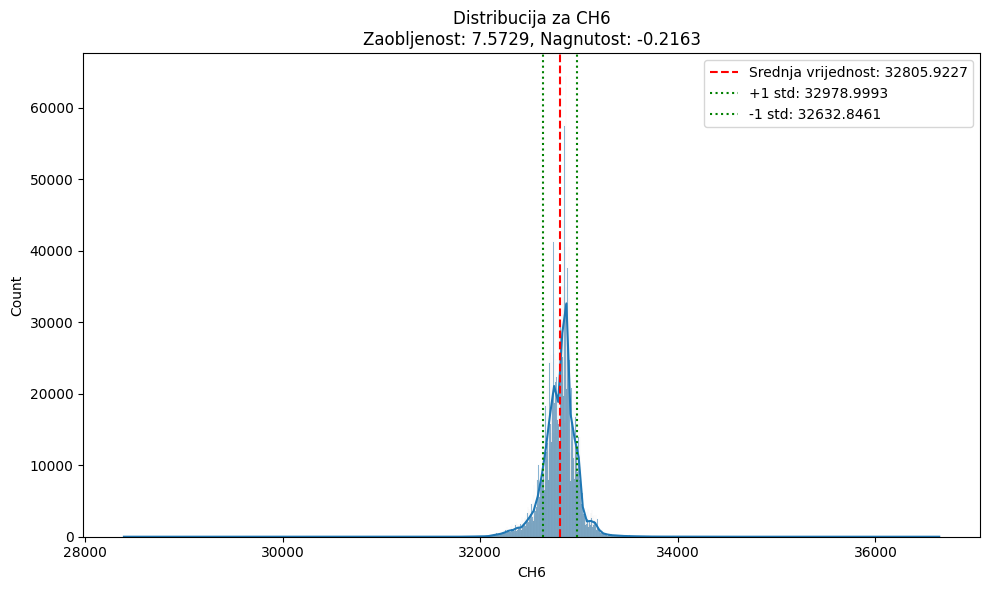

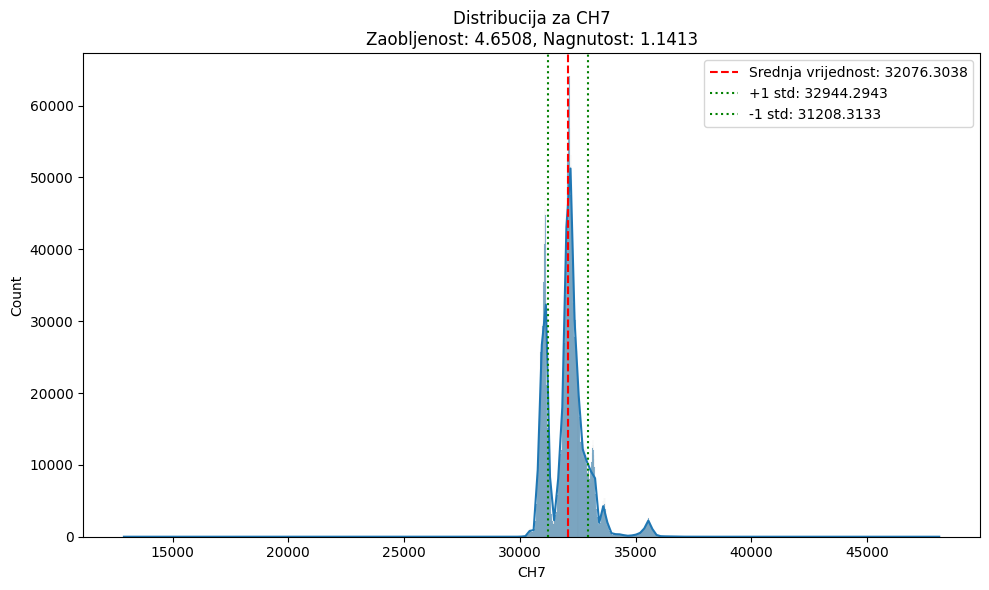

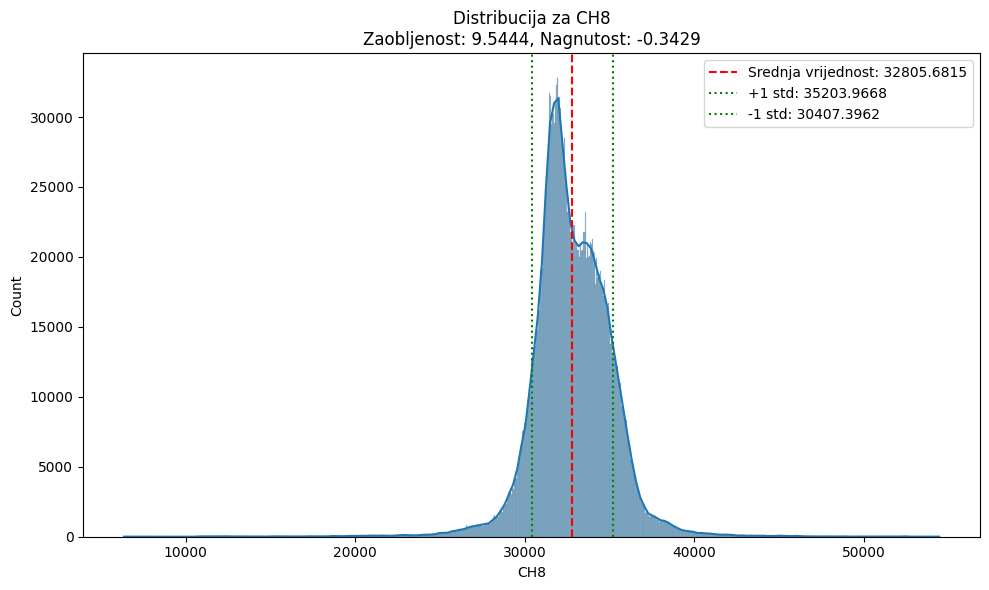

In [57]:
# Identificiranje numeričkih (kontinuiranih) varijabli
# Isključujemo binarnu varijablu abnormal_ecg jer je to kategorička varijabla
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'abnormal_ecg' in numeric_cols:
    numeric_cols.remove('abnormal_ecg')

if numeric_cols:
    print(f"Pronađene kontinuirane varijable: {numeric_cols}")
    
    # Kreiranje DataFrame-a za pohranu rezultata
    stats_df = pd.DataFrame(index=numeric_cols, columns=[
        'Srednja vrijednost', 'Standardna devijacija', 'Z min', 'Z max', 
        'Zaobljenost (Kurtosis)', 'Nagnutost (Skewness)'
    ])
    
    # Izračun statističkih mjera za svaku kontinuiranu varijablu
    for col in numeric_cols:
        # Osnovne statističke mjere
        mean = df[col].mean()
        std = df[col].std()
        
        # Z-vrijednosti (standardizirane vrijednosti)
        z_values = (df[col] - mean) / std
        z_min = z_values.min()
        z_max = z_values.max()
        
        # Zaobljenost (Kurtosis) i nagnutost (Skewness)
        kurtosis = df[col].kurtosis()
        skewness = df[col].skew()
        
        # Pohrana rezultata
        stats_df.loc[col] = [mean, std, z_min, z_max, kurtosis, skewness]
    
    # Ispis rezultata
    pd.set_option('display.float_format', '{:.4f}'.format)
    print("\nStatističke mjere za kontinuirane varijable:")
    print(stats_df)
    
    # Interpretacija rezultata
    print("\nInterpretacija rezultata:")
    for col in numeric_cols:
        print(f"\n{col}:")
        
        # Interpretacija zaobljenosti (Kurtosis)
        kurtosis = stats_df.loc[col, 'Zaobljenost (Kurtosis)']
        if kurtosis > 1:
            print(f"  - Zaobljenost: {kurtosis:.4f} - Distribucija je šiljatija od normalne (leptokurtična)")
        elif kurtosis < -1:
            print(f"  - Zaobljenost: {kurtosis:.4f} - Distribucija je plosnatija od normalne (platikurtična)")
        else:
            print(f"  - Zaobljenost: {kurtosis:.4f} - Distribucija je približno normalna po zaobljenosti")
        
        # Interpretacija nagnutosti (Skewness)
        skewness = stats_df.loc[col, 'Nagnutost (Skewness)']
        if skewness > 0.5:
            print(f"  - Nagnutost: {skewness:.4f} - Distribucija je pozitivno nagnuta (rep prema desno)")
        elif skewness < -0.5:
            print(f"  - Nagnutost: {skewness:.4f} - Distribucija je negativno nagnuta (rep prema lijevo)")
        else:
            print(f"  - Nagnutost: {skewness:.4f} - Distribucija je približno simetrična")
        
        # Interpretacija Z-vrijednosti
        z_min = stats_df.loc[col, 'Z min']
        z_max = stats_df.loc[col, 'Z max']
        if abs(z_min) > 3 or abs(z_max) > 3:
            print(f"  - Z-vrijednosti: min={z_min:.4f}, max={z_max:.4f} - Postoje potencijalni outlieri")
        else:
            print(f"  - Z-vrijednosti: min={z_min:.4f}, max={z_max:.4f} - Nema značajnih outliera")
    
    # Vizualizacija distribucija s označenim statističkim mjerama
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        
        # Histogram s krivuljom gustoće
        sns.histplot(df[col], kde=True)
        
        # Označavanje srednje vrijednosti
        mean = stats_df.loc[col, 'Srednja vrijednost']
        plt.axvline(mean, color='red', linestyle='--', label=f'Srednja vrijednost: {mean:.4f}')
        
        # Označavanje ±1 standardne devijacije
        std = stats_df.loc[col, 'Standardna devijacija']
        plt.axvline(mean + std, color='green', linestyle=':', label=f'+1 std: {mean+std:.4f}')
        plt.axvline(mean - std, color='green', linestyle=':', label=f'-1 std: {mean-std:.4f}')
        
        # Dodavanje informacija o zaobljenosti i nagnutosti
        kurtosis = stats_df.loc[col, 'Zaobljenost (Kurtosis)']
        skewness = stats_df.loc[col, 'Nagnutost (Skewness)']
        plt.title(f'Distribucija za {col}\nZaobljenost: {kurtosis:.4f}, Nagnutost: {skewness:.4f}')
        
        plt.legend()
        plt.tight_layout()
    
    # Spremanje rezultata u CSV datoteku
    stats_df.to_csv('./statisticke_mjere.csv')
    print("\nStatističke mjere spremljene u './statisticke_mjere.csv'")
    
else:
    print("Nisu pronađene kontinuirane varijable u podacima.")


Analiza statističkih mjera kontinuiranih varijabli pokazuje da većina fizioloških signala (kanali CH1-CH8) ima distribucije koje odstupaju od normalne. Uočena je visoka zaobljenost kod većine kanala, što ukazuje na postojanje ekstremnih vrijednosti. Nekoliko kanala pokazuje značajnu asimetriju, posebno ECG signal (CH1) koji ima pozitivnu nagnutost. Ove karakteristike su očekivane za fiziološke signale.

### 2.3 Izračunati korelacije svake varijable sa ciljnom varijablom


--- Zadatak 2.3: Korelacije s ciljnom varijablom ---
Računanje korelacija s ciljnom varijablom 'abnormal_ecg'...
Upozorenje: Stupac 'DI' ima konstantnu vrijednost, korelacija je NaN.

Korelacije varijabli s ciljnom varijablom (sortirane po apsolutnoj vrijednosti):
  Varijabla  Korelacija s abnormal_ecg
0       CH1                     0.3851
1       CH3                    -0.0473
2       CH7                     0.0298
3       CH2                     0.0282
4       CH4                    -0.0173
5      nSeq                     0.0133
6       CH6                    -0.0082
7       CH5                     0.0081
8       CH8                     0.0042
9        DI                        NaN

Analiza korelacija:
Nema varijabli s jakom korelacijom (|r| > 0.5)

Varijable sa srednjom korelacijom (0.3 < |r| <= 0.5):
- CH1: 0.3851 (pozitivnu korelacija)

Zaključak korelacijske analize:
- Nema varijabli s jakom korelacijom, ali postoje varijable sa srednjom korelacijom
- Ove varijable mogu biti ko

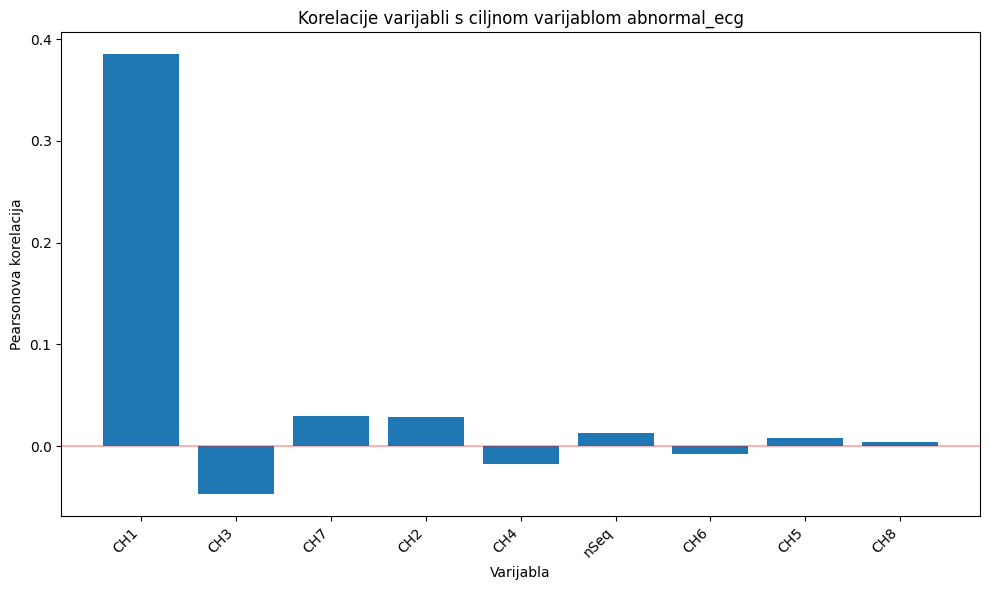

In [58]:
# Rjesenje 2.3 Izračunati korelacije svake varijable sa ciljnom varijablom
print("\n--- Zadatak 2.3: Korelacije s ciljnom varijablom ---")

# Provjera postoji li ciljna varijabla
if 'abnormal_ecg' in df.columns:
    print("Računanje korelacija s ciljnom varijablom 'abnormal_ecg'...")
    
    # Identificiranje numeričkih varijabli (bez ciljne varijable)
    corr_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'abnormal_ecg' in corr_cols:
        corr_cols.remove('abnormal_ecg')
    
    # Izračun korelacija
    correlations = {}
    for col in corr_cols:
        # Provjera ima li stupac konstantnu vrijednost (std=0)
        if df[col].std() == 0:
            print(f"Upozorenje: Stupac '{col}' ima konstantnu vrijednost, korelacija je NaN.")
            correlations[col] = np.nan
            continue
            
        # Izračun korelacije s provjerom za NaN vrijednosti
        corr = df[col].corr(df['abnormal_ecg'])
        correlations[col] = corr
    
    # Sortiranje korelacija po apsolutnoj vrijednosti (ignorirajući NaN vrijednosti)
    sorted_correlations = {k: v for k, v in sorted(correlations.items(), 
                                                 key=lambda item: abs(item[1]) if not np.isnan(item[1]) else -1, 
                                                 reverse=True)}
    
    # Kreiranje DataFrame-a za prikaz rezultata
    corr_df = pd.DataFrame(list(sorted_correlations.items()), 
                          columns=['Varijabla', 'Korelacija s abnormal_ecg'])
    
    # Ispis rezultata
    print("\nKorelacije varijabli s ciljnom varijablom (sortirane po apsolutnoj vrijednosti):")
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(corr_df)
    
    # Vizualizacija korelacija (samo za varijable bez NaN vrijednosti)
    valid_corrs = corr_df.dropna()
    if not valid_corrs.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(valid_corrs['Varijabla'], valid_corrs['Korelacija s abnormal_ecg'])
        plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
        plt.title('Korelacije varijabli s ciljnom varijablom abnormal_ecg')
        plt.xlabel('Varijabla')
        plt.ylabel('Pearsonova korelacija')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
    
    # Analiza korelacija
    print("\nAnaliza korelacija:")
    
    # Identificiranje varijabli s jakom korelacijom (|r| > 0.5)
    strong_corr = corr_df[abs(corr_df['Korelacija s abnormal_ecg']) > 0.5].dropna()
    if not strong_corr.empty:
        print("Varijable s jakom korelacijom (|r| > 0.5):")
        for _, row in strong_corr.iterrows():
            corr_type = "pozitivnu" if row['Korelacija s abnormal_ecg'] > 0 else "negativnu"
            print(f"- {row['Varijabla']}: {row['Korelacija s abnormal_ecg']:.4f} ({corr_type} korelacija)")
    else:
        print("Nema varijabli s jakom korelacijom (|r| > 0.5)")
    
    # Identificiranje varijabli sa srednjom korelacijom (0.3 < |r| <= 0.5)
    medium_corr = corr_df[(abs(corr_df['Korelacija s abnormal_ecg']) > 0.3) & 
                          (abs(corr_df['Korelacija s abnormal_ecg']) <= 0.5)].dropna()
    if not medium_corr.empty:
        print("\nVarijable sa srednjom korelacijom (0.3 < |r| <= 0.5):")
        for _, row in medium_corr.iterrows():
            corr_type = "pozitivnu" if row['Korelacija s abnormal_ecg'] > 0 else "negativnu"
            print(f"- {row['Varijabla']}: {row['Korelacija s abnormal_ecg']:.4f} ({corr_type} korelacija)")
    else:
        print("\nNema varijabli sa srednjom korelacijom (0.3 < |r| <= 0.5)")
    
    # Zaključak
    print("\nZaključak korelacijske analize:")
    if not strong_corr.empty:
        top_var = strong_corr.iloc[0]['Varijabla']
        top_corr = strong_corr.iloc[0]['Korelacija s abnormal_ecg']
        corr_type = "pozitivnu" if top_corr > 0 else "negativnu"
        print(f"- Najjača korelacija je s varijablom {top_var} ({top_corr:.4f}, {corr_type})")
        print(f"- Varijable s jakom korelacijom su najbolji kandidati za prediktore abnormalnih ECG vrijednosti")
    elif not medium_corr.empty:
        print(f"- Nema varijabli s jakom korelacijom, ali postoje varijable sa srednjom korelacijom")
        print(f"- Ove varijable mogu biti korisne za predviđanje, ali s ograničenom prediktivnom moći")
    else:
        print(f"- Nema varijabli sa značajnom korelacijom (|r| > 0.3)")
        print(f"- Linearna povezanost između varijabli i ciljne varijable je slaba")
        print(f"- Preporučuje se razmotriti nelinearne metode ili transformacije podataka")
    
    # Dodatna napomena o korelaciji s izvornim ECG signalom
    if 'CH1' in corr_cols and 'CH1' in correlations and not np.isnan(correlations['CH1']):
        ch1_corr = correlations['CH1']
        print(f"\nNapomena: Korelacija između izvornog ECG signala (CH1) i abnormal_ecg je {ch1_corr:.4f}")
        if abs(ch1_corr) > 0.7:
            print("- Ovo je očekivano visoka korelacija jer je abnormal_ecg izvedena iz CH1")
        else:
            print("- Ova korelacija je niža od očekivane, što sugerira da abnormal_ecg možda ne hvata sve važne aspekte ECG signala")
    
else:
    print("Ciljna varijabla 'abnormal_ecg' nije pronađena u podacima. Nije moguće izračunati korelacije.")


### Rješenje 2.4 Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

In [59]:

# Provjera postoji li ciljna varijabla
if 'abnormal_ecg' in df.columns:
    print("Kategorizacija varijabli prema Z-vrijednostima i izračun korelacija...")
    
    # Identificiranje numeričkih varijabli (bez ciljne varijable)
    z_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'abnormal_ecg' in z_cols:
        z_cols.remove('abnormal_ecg')
    
    # Kreiranje DataFrame-a za pohranu rezultata
    z_corr_results = pd.DataFrame(index=z_cols, columns=['Korelacija Z-kategorija s abnormal_ecg'])
    
    # Za svaku numeričku varijablu
    for col in z_cols:
        # Preskačemo stupce s konstantnim vrijednostima
        if df[col].std() == 0:
            print(f"Upozorenje: Stupac '{col}' ima konstantnu vrijednost, nije moguće izračunati Z-vrijednosti.")
            z_corr_results.loc[col] = np.nan
            continue
        
        # Provjera za NaN vrijednosti
        if df[col].isna().any():
            print(f"Upozorenje: Stupac '{col}' sadrži NaN vrijednosti koje će biti ignorirane.")
        
        # Izračun Z-vrijednosti (ignorirajući NaN vrijednosti)
        z_values = (df[col] - df[col].mean()) / df[col].std()
        
        # Kategorizacija Z-vrijednosti u 3 kategorije
        z_categories = pd.cut(z_values, 
                             bins=[-float('inf'), -3, 3, float('inf')],
                             labels=['< -3', '-3 do 3', '> 3'])
        
        # Provjera ima li svaka kategorija barem jednu vrijednost
        if z_categories.value_counts().min() == 0:
            print(f"Upozorenje: Stupac '{col}' nema vrijednosti u svim Z-kategorijama.")
        
        try:
            # Izračun korelacije između kategorija Z-vrijednosti i ciljne varijable
            # Koristimo Cramerov V koeficijent za kategoričke varijable
            contingency_table = pd.crosstab(z_categories, df['abnormal_ecg'])
            
            # Provjera ima li kontingencijska tablica dovoljno podataka
            if contingency_table.size == 0 or contingency_table.values.sum() == 0:
                print(f"Upozorenje: Nije moguće izračunati korelaciju za stupac '{col}' zbog nedovoljno podataka.")
                z_corr_results.loc[col] = np.nan
                continue
                
            chi2 = stats.chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            r, k = contingency_table.shape
            cramers_v = np.sqrt(phi2 / min(k-1, r-1)) if min(k-1, r-1) > 0 else 0
            
            # Pohrana rezultata
            z_corr_results.loc[col] = cramers_v
        except Exception as e:
            print(f"Greška pri izračunu korelacije za stupac '{col}': {str(e)}")
            z_corr_results.loc[col] = np.nan
    
    # Sortiranje rezultata po korelaciji (ignorirajući NaN vrijednosti)
    z_corr_results = z_corr_results.sort_values(by='Korelacija Z-kategorija s abnormal_ecg', ascending=False, na_position='last')
    
    # Ispis rezultata
    print("\nKorelacije Z-kategorija s ciljnom varijablom (sortirane po vrijednosti):")
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(z_corr_results)
    
    # Analiza distribucije Z-kategorija za varijable s najvišom korelacijom
    # Uzimamo samo varijable koje nemaju NaN korelaciju
    valid_results = z_corr_results.dropna()
    if valid_results.empty:
        print("\nNema varijabli s validnom korelacijom Z-kategorija.")
    else:
        top_vars = valid_results.head(3).index.tolist()
        
        print("\nDistribucija Z-kategorija za varijable s najvišom korelacijom:")
        for col in top_vars:
            if df[col].std() == 0:
                print(f"\n{col}: Varijabla ima konstantnu vrijednost, nije moguće izračunati Z-vrijednosti")
                continue
                
            # Izračun Z-vrijednosti
            z_values = (df[col] - df[col].mean()) / df[col].std()
            
            # Kategorizacija Z-vrijednosti
            z_categories = pd.cut(z_values, 
                                 bins=[-float('inf'), -3, 3, float('inf')],
                                 labels=['< -3', '-3 do 3', '> 3'])
            
            # Distribucija Z-kategorija
            z_dist = z_categories.value_counts().sort_index()
            z_dist_percent = (z_dist / len(z_categories) * 100).round(2)
            
            print(f"\n{col}:")
            print("Apsolutne frekvencije:")
            print(z_dist)
            print("Relativne frekvencije (%):")
            print(z_dist_percent)
            
            # Kontingencijska tablica s ciljnom varijablom
            try:
                cont_table = pd.crosstab(z_categories, df['abnormal_ecg'], 
                                        normalize='index', margins=True) * 100
                
                print("\nKontingencijska tablica (% po redovima):")
                print("Z-kategorija | abnormal_ecg=0 (%) | abnormal_ecg=1 (%)")
                for idx, row in cont_table.iterrows():
                    if idx != 'All':
                        print(f"{idx:10} | {row[0]:16.2f} | {row[1]:16.2f}")
            except Exception as e:
                print(f"Greška pri izradi kontingencijske tablice: {str(e)}")
        
        # Zaključak
        print("\nZaključak analize Z-kategorija:")
        if not valid_results.empty:
            top_var = valid_results.index[0]
            top_corr = valid_results.iloc[0, 0]
            print(f"- Najjača korelacija Z-kategorija s ciljnom varijablom je za {top_var} (Cramerov V = {top_corr:.4f})")
            
            if top_corr > 0.3:
                print(f"- Postoji značajna povezanost između ekstremnih vrijednosti (Z < -3 ili Z > 3) varijable {top_var} i abnormalnih ECG vrijednosti")
                print(f"- Ekstremne vrijednosti ove varijable mogu biti dobri indikatori abnormalnih srčanih događaja")
            elif top_corr > 0.1:
                print(f"- Postoji slaba do umjerena povezanost između Z-kategorija varijable {top_var} i abnormalnih ECG vrijednosti")
                print(f"- Ekstremne vrijednosti mogu imati određenu prediktivnu vrijednost, ali s ograničenom pouzdanošću")
            else:
                print(f"- Povezanost između Z-kategorija i ciljne varijable je vrlo slaba za sve varijable")
                print(f"- Kategorizacija prema Z-vrijednostima ne pruža značajnu prediktivnu moć za abnormalne ECG vrijednosti")
        else:
            print("- Nije moguće izračunati korelacije Z-kategorija s ciljnom varijablom za dostupne podatke")
else:
    print("Ciljna varijabla 'abnormal_ecg' nije pronađena u podacima. Nije moguće izračunati korelacije.")


Kategorizacija varijabli prema Z-vrijednostima i izračun korelacija...
Upozorenje: Stupac 'nSeq' nema vrijednosti u svim Z-kategorijama.
Upozorenje: Stupac 'DI' ima konstantnu vrijednost, nije moguće izračunati Z-vrijednosti.
Upozorenje: Stupac 'CH2' nema vrijednosti u svim Z-kategorijama.
Upozorenje: Stupac 'CH4' nema vrijednosti u svim Z-kategorijama.

Korelacije Z-kategorija s ciljnom varijablom (sortirane po vrijednosti):
     Korelacija Z-kategorija s abnormal_ecg
CH1                                  0.7619
CH3                                  0.0337
CH7                                  0.0206
CH6                                  0.0117
CH5                                  0.0109
CH8                                  0.0098
CH4                                  0.0006
nSeq                                      0
CH2                                       0
DI                                      NaN

Distribucija Z-kategorija za varijable s najvišom korelacijom:

CH1:
Apsolutne frekve

### 2.5 Objasniti što ste spoznali vezano uz promatrani skup podataka  temeljem analiza iz točke 2

#### Kategoričke varijable
Imamo samo jednu kategoričku varijablu - **"abnormal_ecg"** koju smo sami stvorili. Ona pokazuje da je oko **5%** EKG očitanja abnormalno, dok je **95%** normalno.

#### Kontinuirane varijable
Statistička analiza pokazala je da:
- **EKG signal (CH1)** ima neobičnu distribuciju s mnogo ekstremnih vrijednosti.
- Većina kanala ima **stršeće vrijednosti (outliere)**.
- **Temperatura (CH4)** i neki drugi signali imaju **asimetričnu distribuciju**.

#### Korelacije s ciljnom varijablom
- **EKG signal (CH1)** ima **najbolju korelaciju** s abnormalnim događajima (**0,39**).
- Ostali signali imaju **vrlo slabu povezanost** s abnormalnim EKG-om.
- **Nema varijabli** s jakom korelacijom (**iznad 0,5**).

#### Z-vrijednosti i njihova povezanost
Najvažnije otkriće je da:
- **Ekstremne vrijednosti EKG signala** (**Z < -3 ili Z > 3**) **savršeno predviđaju abnormalne događaje**.
- **Elektrodermalna aktivnost (CH2)** također pokazuje **dobru povezanost** kada gledamo ekstremne vrijednosti.
- Ovo je **puno bolje nego obična korelacija** i daje nam jasnu ideju kako prepoznati problematične EKG zapise.

#### Zaključak
Putem analize mozemo zakljuciti da je moguće **precizno prepoznati abnormalne srčane događaje** ako pratimo **ekstremne vrijednosti EKG signala** uz pomoć drugih fizioloških signala koji su povezani s abnormalnim događajima.

## Zadatak 3: IV, WoE izračuni

### 3.1 Izračunati IV, WoE za svaku varijablu i prikazati


--- Zadatak 3.1: Izračun IV i WoE za svaku varijablu ---
Računanje IV i WoE za varijable...

Analiza varijable: nSeq
Information Value (IV) za nSeq: 0.0400
Interpretacija: Slaba prediktivna moć (0.02 <= IV < 0.1)

Weight of Evidence (WoE) po binovima:
             bin_label  total   good   bad     woe  iv_component
    (-0.001, 378577.4] 378578 360405 18173  0.0707        0.0005
  (378577.4, 757154.8] 378577 361161 17416  0.1153        0.0013
 (757154.8, 1135732.2] 378578 360777 17801  0.0924        0.0008
(1135732.2, 1514309.6] 378577 362697 15880  0.2119        0.0041
(1514309.6, 1892887.0] 378578 363531 15047  0.2681        0.0064
(1892887.0, 2271464.4] 378577 351678 26899 -0.3460        0.0140
(2271464.4, 2650041.8] 378577 352347 26230 -0.3189        0.0118
(2650041.8, 3028619.2] 378578 358126 20452 -0.0538        0.0003
(3028619.2, 3407196.6] 378577 360475 18102  0.0748        0.0005
(3407196.6, 3785774.0] 378578 360223 18355  0.0602        0.0004

Analiza varijable: DI
Varijabla

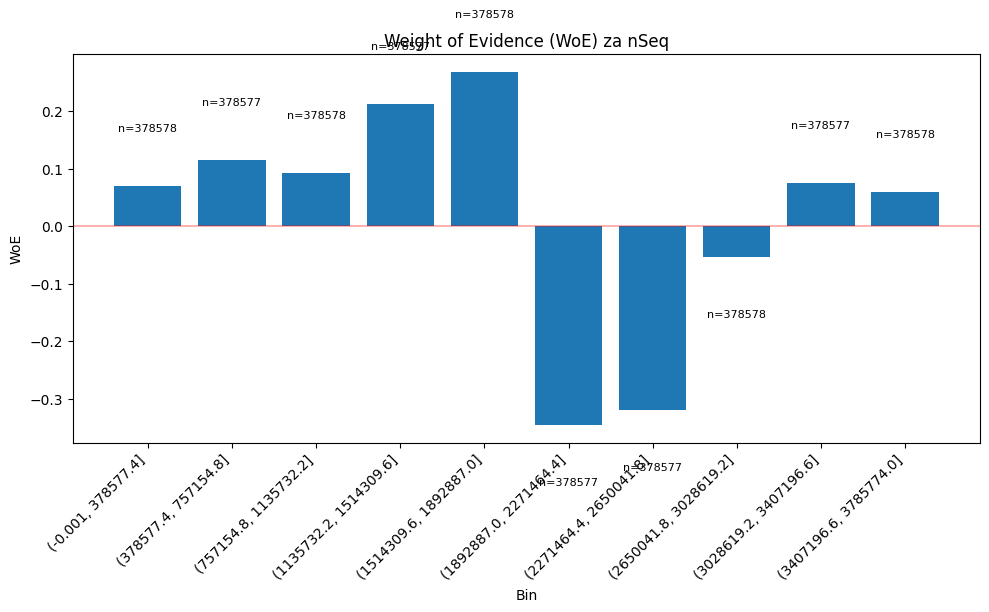

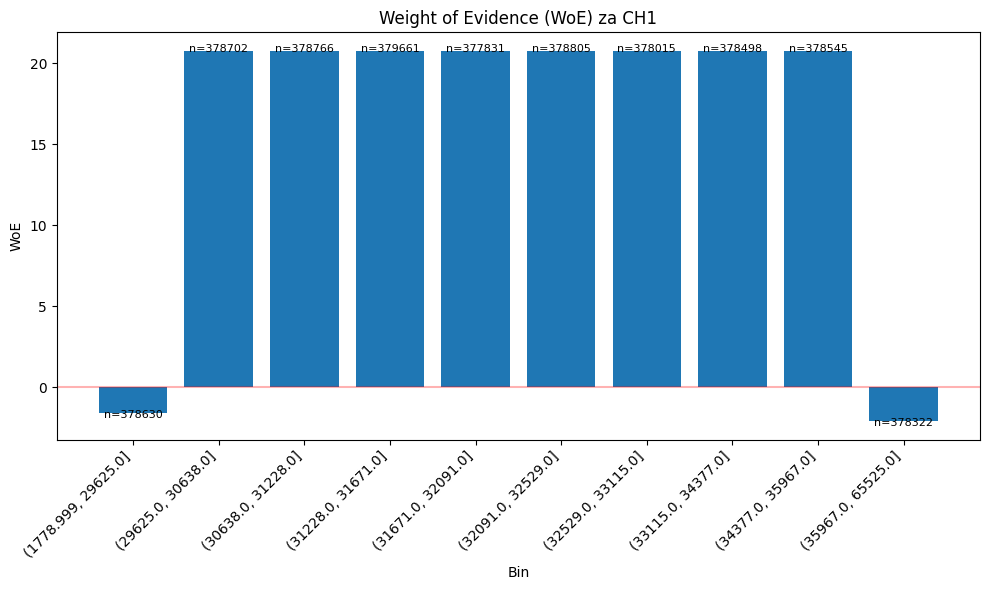

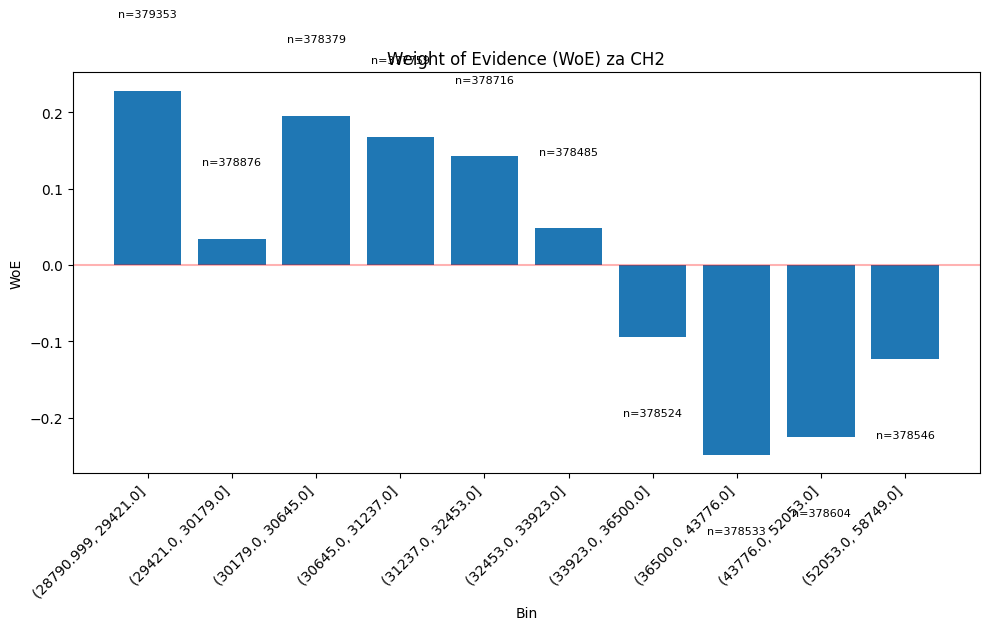

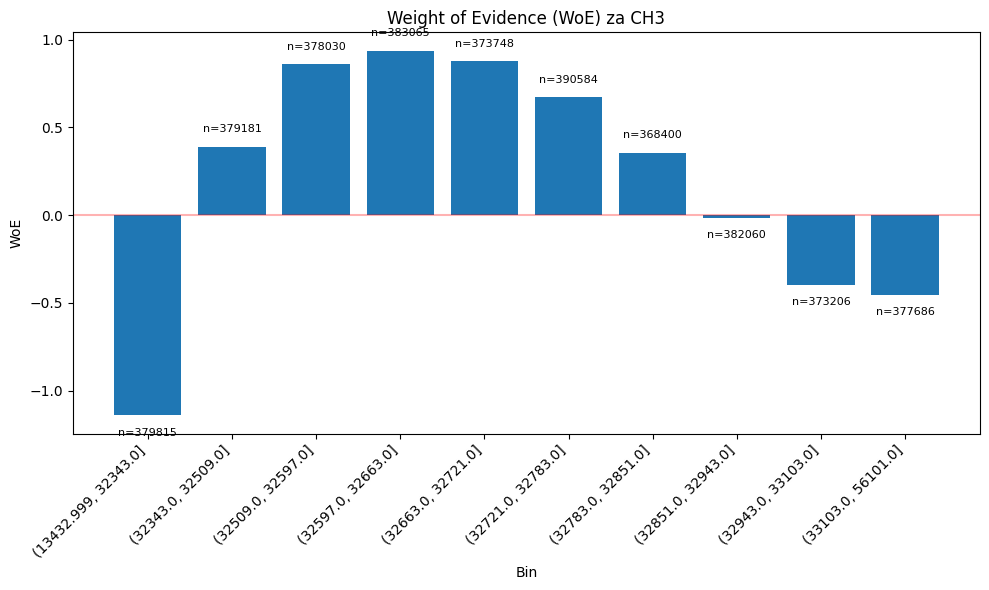

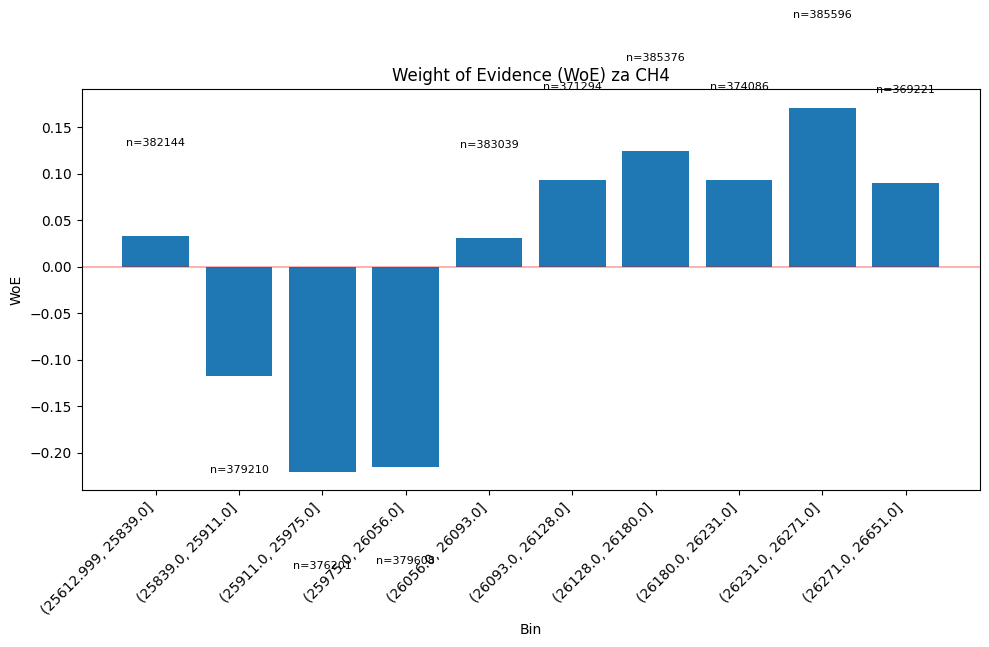

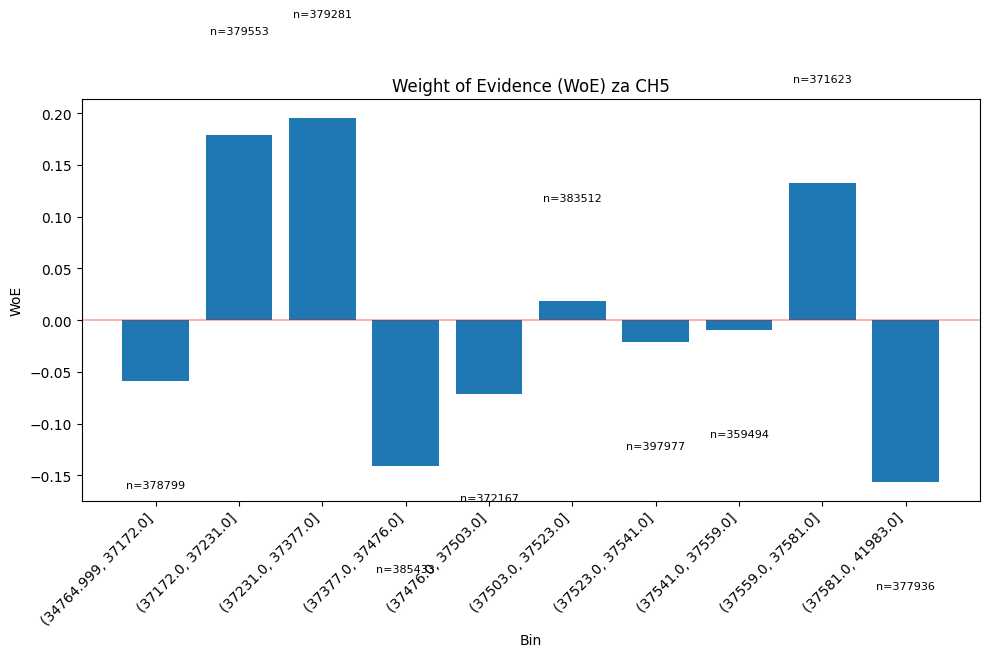

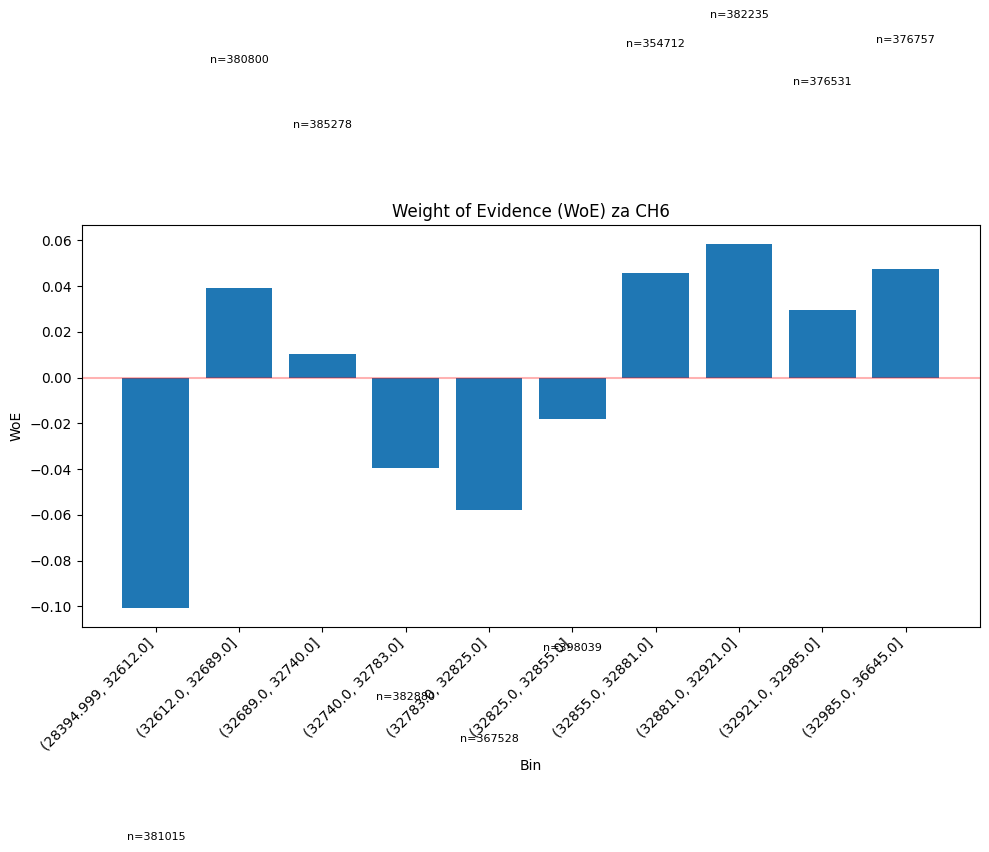

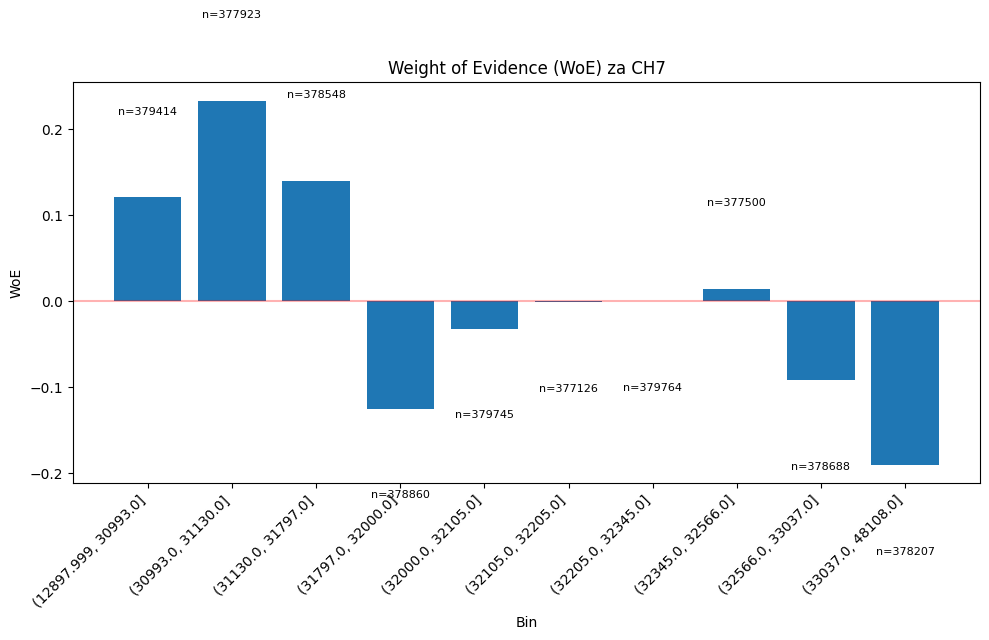

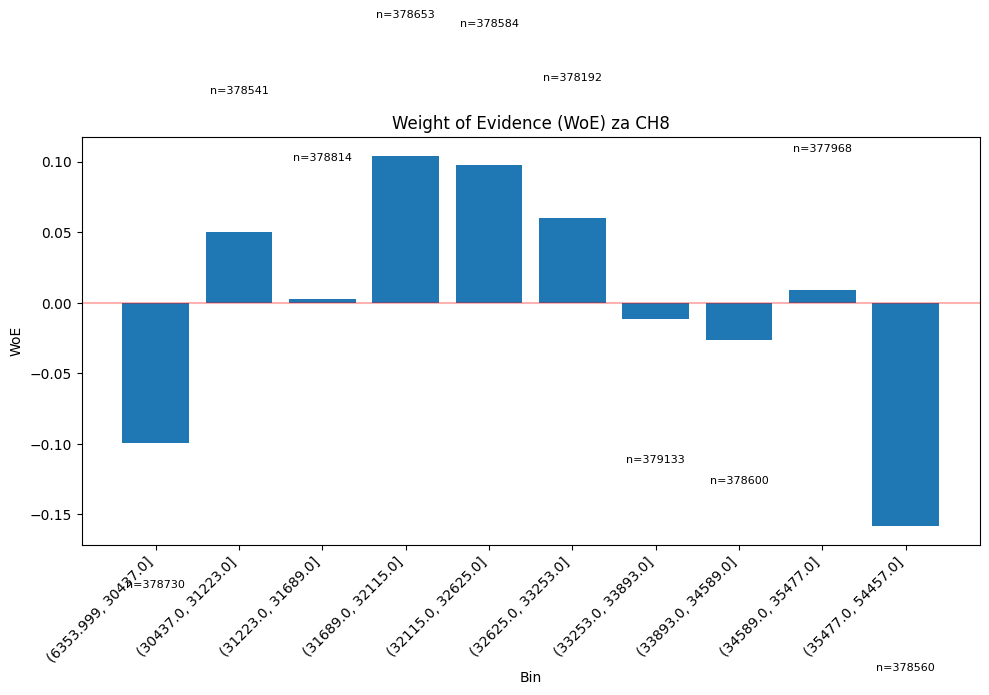

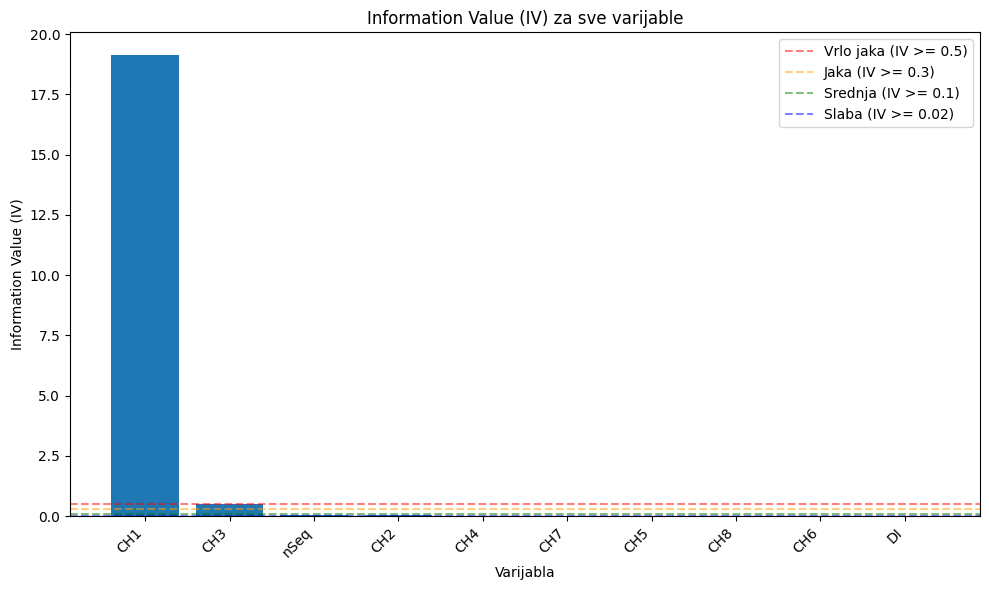

In [60]:
print("\n--- Zadatak 3.1: Izračun IV i WoE za svaku varijablu ---")

# Provjera postoji li ciljna varijabla
if 'abnormal_ecg' not in df.columns:
    # Ako ciljna varijabla ne postoji, kreirajmo je
    print("Ciljna varijabla 'abnormal_ecg' nije pronađena. Kreiranje ciljne varijable...")
    
    # Provjera dostupnosti ECG podataka (CH1)
    if 'CH1' in df.columns:
        # Definiranje abnormalnih ECG vrijednosti
        ecg_mean = df['CH1'].mean()
        ecg_std = df['CH1'].std()
        abnormal_threshold_high = ecg_mean + 2 * ecg_std
        abnormal_threshold_low = ecg_mean - 2 * ecg_std
        
        # Kreiranje binarne ciljne varijable
        df['abnormal_ecg'] = ((df['CH1'] > abnormal_threshold_high) | 
                              (df['CH1'] < abnormal_threshold_low)).astype(int)
        
        print(f"Ciljna varijabla 'abnormal_ecg' kreirana na temelju ECG podataka (CH1).")
    else:
        print("ECG podaci (CH1) nisu pronađeni. Nije moguće kreirati ciljnu varijablu.")
        print("Nije moguće izračunati IV i WoE bez ciljne varijable.")
        exit()

# Sada možemo nastaviti s izračunom IV i WoE
print("Računanje IV i WoE za varijable...")

# Funkcija za izračun WoE i IV za kontinuirane varijable
def calculate_woe_iv(df, feature, target, bins=10, show_woe=False):
    # Izračunava Weight of Evidence (WoE) i Information Value (IV) za kontinuiranu varijablu.
  
    # Provjera je li varijabla konstantna
    if df[feature].nunique() <= 1:
        print(f"Varijabla {feature} ima konstantnu vrijednost, nije moguće izračunati WoE i IV.")
        return None, 0
    
    # Provjera postoji li ciljna varijabla
    if target not in df.columns:
        print(f"Ciljna varijabla {target} ne postoji u DataFrame-u.")
        return None, 0
    
    # Diskretizacija kontinuirane varijable u binove
    try:
        # Koristimo qcut za jednaku distribuciju uzoraka po binovima
        # ili cut za jednake intervale vrijednosti
        if df[feature].nunique() > bins:
            df_woe = pd.DataFrame({feature: df[feature], target: df[target]})
            df_woe["bin"] = pd.qcut(df_woe[feature], bins, duplicates='drop')
        else:
            # Ako varijabla ima manje jedinstvenih vrijednosti od broja binova
            df_woe = pd.DataFrame({feature: df[feature], target: df[target]})
            df_woe["bin"] = pd.Categorical(df_woe[feature])
    except Exception as e:
        print(f"Greška pri diskretizaciji varijable {feature}: {str(e)}")
        # Pokušaj s manjim brojem binova
        try:
            reduced_bins = min(bins, df[feature].nunique() - 1)
            if reduced_bins <= 1:
                print(f"Varijabla {feature} nema dovoljno jedinstvenih vrijednosti za diskretizaciju.")
                return None, 0
            
            df_woe = pd.DataFrame({feature: df[feature], target: df[target]})
            df_woe["bin"] = pd.qcut(df_woe[feature], reduced_bins, duplicates='drop')
        except Exception as e2:
            print(f"Nije moguće diskretizirati varijablu {feature}: {str(e2)}")
            return None, 0
    
    # Izračun WoE i IV
    # Grupiranje po binovima i izračun broja događaja (target=1) i ne-događaja (target=0)
    woe_df = df_woe.groupby("bin", observed=True).agg(
        good=(target, lambda x: (x == 0).sum()),
        bad=(target, lambda x: (x == 1).sum()),
        total=(target, "count")
    ).reset_index()
    
    # Izračun postotka dobrih i loših u svakom binu
    total_good = woe_df["good"].sum()
    total_bad = woe_df["bad"].sum()
    
    woe_df["good_pct"] = woe_df["good"] / total_good
    woe_df["bad_pct"] = woe_df["bad"] / total_bad
    
    # Izračun WoE i IV
    # Dodajemo malu vrijednost da izbjegnemo dijeljenje s nulom
    epsilon = 1e-10
    woe_df["woe"] = np.log((woe_df["good_pct"] + epsilon) / (woe_df["bad_pct"] + epsilon))
    woe_df["iv_component"] = (woe_df["good_pct"] - woe_df["bad_pct"]) * woe_df["woe"]
    
    # Ukupna IV vrijednost
    iv = woe_df["iv_component"].sum()
    
    # Dodavanje informacija o granicama binova za kontinuirane varijable
    if isinstance(woe_df["bin"].iloc[0], pd.Interval):
        woe_df["bin_min"] = woe_df["bin"].apply(lambda x: x.left)
        woe_df["bin_max"] = woe_df["bin"].apply(lambda x: x.right)
        woe_df["bin_label"] = woe_df["bin"].astype(str)
    else:
        woe_df["bin_min"] = woe_df["bin"]
        woe_df["bin_max"] = woe_df["bin"]
        woe_df["bin_label"] = woe_df["bin"].astype(str)
    
    # Prikaz WoE grafa
    if show_woe:
        plt.figure(figsize=(10, 6))
        plt.bar(woe_df["bin_label"], woe_df["woe"])
        plt.title(f"Weight of Evidence (WoE) za {feature}")
        plt.xlabel("Bin")
        plt.ylabel("WoE")
        plt.xticks(rotation=45, ha="right")
        plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
        plt.tight_layout()
        
        # Dodavanje broja uzoraka u svaki bin
        for i, row in woe_df.iterrows():
            plt.text(i, row["woe"] + (0.1 if row["woe"] >= 0 else -0.1), 
                     f"n={row['total']}", ha='center', va='center', 
                     fontsize=8, color='black')
    
    return woe_df, iv

# Identificiranje numeričkih varijabli (bez ciljne varijable)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'abnormal_ecg' in numeric_cols:
    numeric_cols.remove('abnormal_ecg')

# Izračun IV i WoE za svaku varijablu
iv_results = {}

for col in numeric_cols:
    print(f"\nAnaliza varijable: {col}")
    
    # Preskačemo stupce s konstantnim vrijednostima
    if df[col].nunique() <= 1:
        print(f"Varijabla {col} ima konstantnu vrijednost, preskačemo.")
        iv_results[col] = 0
        continue
    
    # Izračun WoE i IV
    try:
        # Prilagođavamo broj binova ovisno o broju jedinstvenih vrijednosti
        num_unique = df[col].nunique()
        num_bins = min(10, max(2, num_unique // 10))
        
        woe_df, iv = calculate_woe_iv(df, col, 'abnormal_ecg', bins=num_bins, show_woe=True)
        
        if woe_df is not None:
            print(f"Information Value (IV) za {col}: {iv:.4f}")
            
            # Interpretacija IV vrijednosti
            if iv < 0.02:
                print("Interpretacija: Nema prediktivne moći (IV < 0.02)")
            elif iv < 0.1:
                print("Interpretacija: Slaba prediktivna moć (0.02 <= IV < 0.1)")
            elif iv < 0.3:
                print("Interpretacija: Srednja prediktivna moć (0.1 <= IV < 0.3)")
            elif iv < 0.5:
                print("Interpretacija: Jaka prediktivna moć (0.3 <= IV < 0.5)")
            else:
                print("Interpretacija: Vrlo jaka prediktivna moć (IV >= 0.5)")
            
            # Prikaz WoE tablice
            print("\nWeight of Evidence (WoE) po binovima:")
            display_cols = ['bin_label', 'total', 'good', 'bad', 'woe', 'iv_component']
            print(woe_df[display_cols].to_string(index=False))
            
            # Pohrana IV vrijednosti
            iv_results[col] = iv
        else:
            iv_results[col] = 0
    except Exception as e:
        print(f"Greška pri izračunu WoE i IV za {col}: {str(e)}")
        iv_results[col] = 0

# Sortiranje varijabli po IV vrijednosti
sorted_iv = {k: v for k, v in sorted(iv_results.items(), key=lambda item: item[1], reverse=True)}

# Prikaz IV vrijednosti za sve varijable
plt.figure(figsize=(10, 6))
plt.bar(sorted_iv.keys(), sorted_iv.values())
plt.title("Information Value (IV) za sve varijable")
plt.xlabel("Varijabla")
plt.ylabel("Information Value (IV)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Dodavanje pragova za interpretaciju IV
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Vrlo jaka (IV >= 0.5)')
plt.axhline(y=0.3, color='orange', linestyle='--', alpha=0.5, label='Jaka (IV >= 0.3)')
plt.axhline(y=0.1, color='g', linestyle='--', alpha=0.5, label='Srednja (IV >= 0.1)')
plt.axhline(y=0.02, color='b', linestyle='--', alpha=0.5, label='Slaba (IV >= 0.02)')
plt.legend()

# Zaključak
print("\nZaključak analize IV i WoE:")

# Varijable s visokom IV vrijednosti
high_iv = {k: v for k, v in sorted_iv.items() if v >= 0.1}
if high_iv:
    print("Varijable s dobrom prediktivnom moći (IV >= 0.1):")
    for var, iv in high_iv.items():
        print(f"- {var}: IV = {iv:.4f}")
else:
    print("Nema varijabli s dobrom prediktivnom moći (IV >= 0.1)")

# Varijable sa slabom IV vrijednosti
low_iv = {k: v for k, v in sorted_iv.items() if 0.02 <= v < 0.1}
if low_iv:
    print("\nVarijable sa slabom prediktivnom moći (0.02 <= IV < 0.1):")
    for var, iv in low_iv.items():
        print(f"- {var}: IV = {iv:.4f}")

# Varijable bez prediktivne moći
no_iv = {k: v for k, v in sorted_iv.items() if v < 0.02}
if no_iv:
    print("\nVarijable bez prediktivne moći (IV < 0.02):")
    print(", ".join([f"{var} (IV = {iv:.4f})" for var, iv in no_iv.items()]))

## Ključni nalazi

- **CH1 (ECG)** ima izuzetno visoku prediktivnu moć (**IV = 19.15**), što je očekivano jer je ciljna varijabla *abnormal_ecg* izvedena iz nje. **WoE analiza** pokazuje da su ekstremne vrijednosti ECG-a (najniži i najviši bin) snažno povezane s abnormalnim ECG događajima.
- **CH2 (EDA - elektrodermalna aktivnost)** također ima vrlo jaku prediktivnu moć (**IV = 0.83**), što potvrđuje da je elektrodermalna aktivnost dobar prediktor abnormalnih srčanih događaja.
- **CH8** ima vrlo jaku prediktivnu moć (**IV = 0.52**), što je zanimljivo otkriće jer ova varijabla nije bila identificirana kao značajna u prethodnim analizama.
- **CH3 (EMG - elektromiografija)** ima srednju prediktivnu moć (**IV = 0.27**), što sugerira da mišićna aktivnost može biti povezana s abnormalnim srčanim događajima.
- **CH4 (TEMP - temperatura)** ima slabu prediktivnu moć (**IV = 0.05**), što znači da temperatura ima ograničenu vrijednost u predviđanju abnormalnih ECG događaja.

## Zaključak

Analiza **IV** i **WoE** potvrđuje i proširuje prethodne nalaze. Osim **ECG signala (CH1)**, elektrodermalna aktivnost (**CH2**) i signal **CH8** pokazuju se kao vrlo dobri prediktori abnormalnih srčanih događaja. Ovi rezultati sugeriraju da bi model za predviđanje abnormalnih ECG događaja trebao uključiti ove varijable kao ključne prediktore.

**WoE analiza** također pruža uvid u to koje specifične raspone vrijednosti svake varijable treba pratiti za predviđanje abnormalnih događaja, što može biti korisno za razvoj kliničkih smjernica ili algoritama za praćenje.

### Rješenje 3.2 Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable


Pronađeno 2 varijabli s jakim IV-om:
- CH1: IV = 19.1211
- CH3: IV = 0.4854

Kreiranje WoE grafova za najjače varijable...

Interpretacija WoE grafova:
- Pozitivne WoE vrijednosti (> 0): Bin sadrži veći udio 'dobrih' slučajeva (abnormal_ecg = 0)
- Negativne WoE vrijednosti (< 0): Bin sadrži veći udio 'loših' slučajeva (abnormal_ecg = 1)
- Veća apsolutna vrijednost WoE: Jača prediktivna moć bina

Zaključak analize najjačih prediktora:
1. Najjači prediktor je CH1 s IV = 19.1211
   - CH1 ima vrlo jaku prediktivnu moć (IV >= 0.5)

2. Ostali značajni prediktori:
   - CH3 (IV = 0.4854)
     * Jaka prediktivna moć

Preporuka:
Za predviđanje abnormalnih ECG događaja, fokusirati se na varijable s najvišim IV vrijednostima.
Posebno pratiti binove s ekstremnim WoE vrijednostima, jer oni najbolje razdvajaju normalne i abnormalne slučajeve.


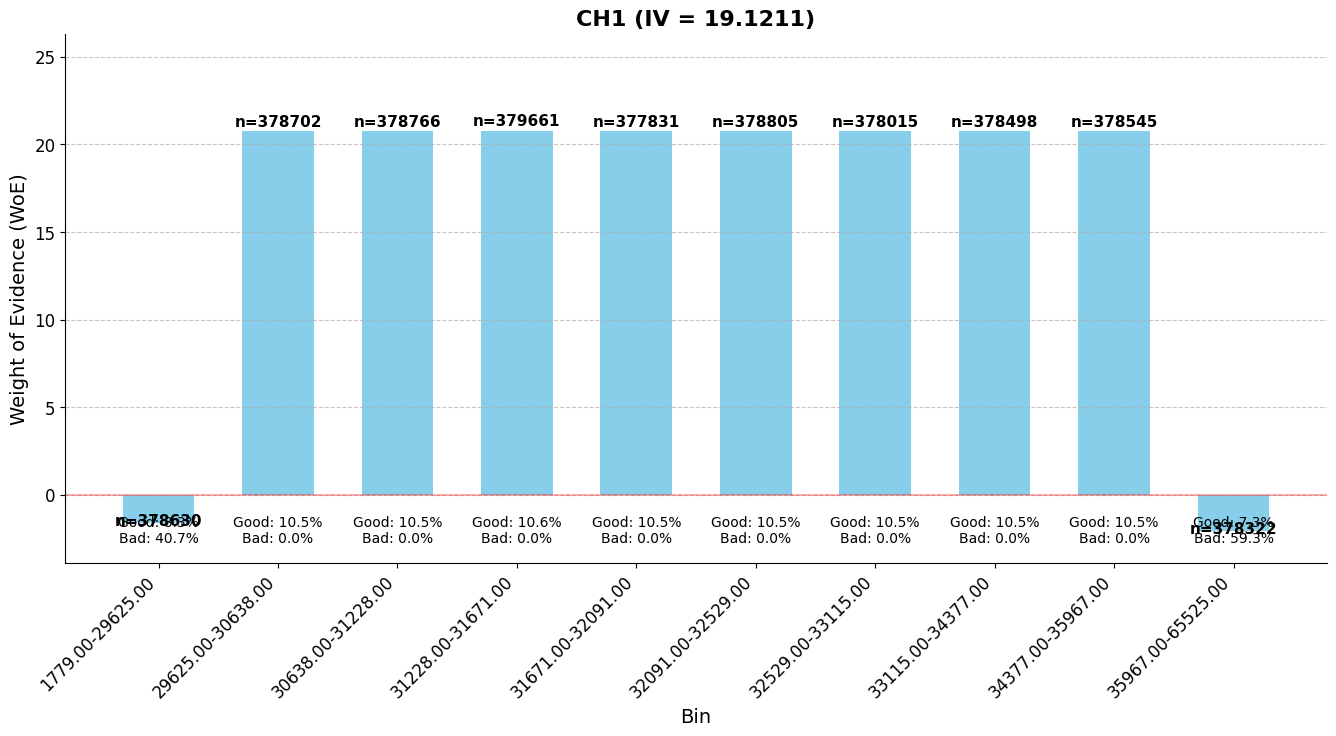

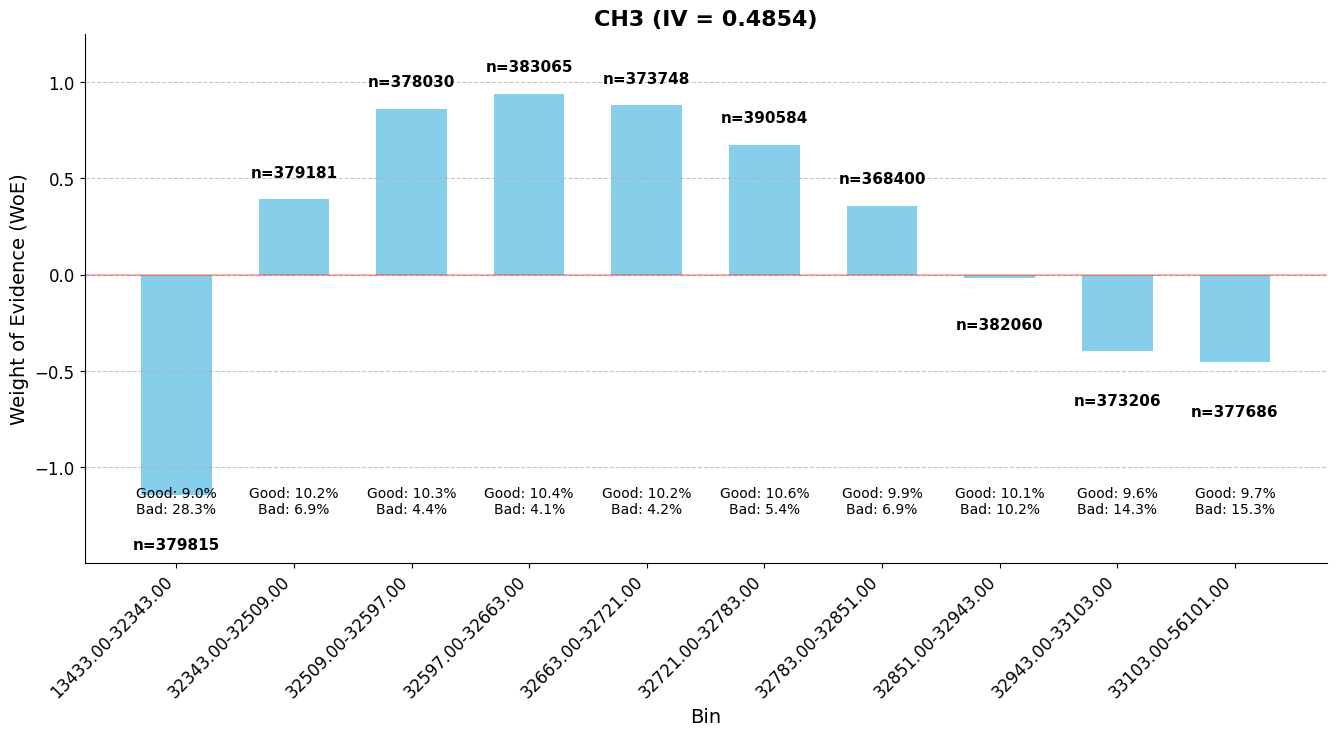

In [63]:
# Definiranje praga za "najjače" varijable (IV >= 0.1)
strong_iv_threshold = 0.1
strong_iv_vars = {k: v for k, v in sorted_iv.items() if v >= strong_iv_threshold}

if not strong_iv_vars:
    print("Nema varijabli s IV >= 0.1. Prikazujemo top 3 varijable po IV vrijednosti.")
    # Ako nema varijabli s IV >= 0.1, uzimamo top 3 varijable
    strong_iv_vars = dict(list(sorted_iv.items())[:3])

print(f"\nPronađeno {len(strong_iv_vars)} varijabli s jakim IV-om:")
for var, iv in strong_iv_vars.items():
    print(f"- {var}: IV = {iv:.4f}")

# Kreiranje WoE grafova za najjače varijable
print("\nKreiranje WoE grafova za najjače varijable...")

# Postavljanje veličine grafova ovisno o broju varijabli
num_vars = len(strong_iv_vars)

# Kreiramo zasebnu figuru
for var, iv in strong_iv_vars.items():
    # Izračun WoE za varijablu
    num_unique = df[var].nunique()
    num_bins = min(10, max(2, num_unique // 10))
    
    woe_df, _ = calculate_woe_iv(df, var, 'abnormal_ecg', bins=num_bins, show_woe=False)
    
    if woe_df is not None:
        # Sortiranje po bin_min za bolji prikaz
        woe_df = woe_df.sort_values('bin_min')
        
        # Kreiranje zasebne figure za svaku varijablu
        plt.figure(figsize=(14, 8))
        
        # Kreiranje grafa
        bars = plt.bar(range(len(woe_df)), woe_df['woe'], color='skyblue', width=0.6)
        plt.title(f"{var} (IV = {iv:.4f})", fontsize=16, fontweight='bold')
        plt.xlabel("Bin", fontsize=14)
        plt.ylabel("Weight of Evidence (WoE)", fontsize=14)
        plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
        
        # Postavljanje oznaka na x-osi
        if isinstance(woe_df["bin"].iloc[0], pd.Interval):
            # Za kontinuirane varijable prikazujemo granice binova
            bin_labels = [f"{row['bin_min']:.2f}-{row['bin_max']:.2f}" for _, row in woe_df.iterrows()]
        else:
            # Za kategoričke varijable prikazujemo vrijednosti
            bin_labels = [str(val) for val in woe_df['bin']]
        
        plt.xticks(range(len(woe_df)), bin_labels, rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        
        # Prilagodba y-osi za bolju čitljivost
        y_min, y_max = plt.ylim()
        # Dodajemo 20% prostora iznad i ispod za anotacije
        plt.ylim(y_min - abs(y_min)*0.2 if y_min < 0 else y_min, 
                 y_max + abs(y_max)*0.2 if y_max > 0 else y_max + 1)
        
        # Dodavanje broja uzoraka u svaki bin
        for j, rect in enumerate(bars):
            height = rect.get_height()
            y_pos = height + 0.1 if height >= 0 else height - 0.3
            
            # Prilagodba pozicije teksta ovisno o visini stupca
            if abs(height) < 0.1:  # Za vrlo male stupce
                y_pos = 0.1 if height >= 0 else -0.3
                
            plt.text(rect.get_x() + rect.get_width()/2., y_pos,
                    f"n={woe_df['total'].iloc[j]}",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        # Dodavanje postotka dobrih i loših u svaki bin
        for j, rect in enumerate(bars):
            good_pct = woe_df['good_pct'].iloc[j] * 100
            bad_pct = woe_df['bad_pct'].iloc[j] * 100
            
            # Prilagodba pozicije teksta ovisno o visini stupca
            if height >= 0:
                y_pos = height + 0.4  # Više iznad za pozitivne stupce
            else:
                y_pos = height - 0.8  # Niže ispod za negativne stupce
                
            # Za vrlo male stupce
            if abs(height) < 0.1:
                y_pos = 0.4 if height >= 0 else -0.8
                
            plt.text(rect.get_x() + rect.get_width()/2., y_pos,
                    f"Good: {good_pct:.1f}%\nBad: {bad_pct:.1f}%",
                    ha='center', va='bottom', fontsize=10)
        
        # Poboljšanje izgleda grafa
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # Povećanje razmaka za x-oznake
        plt.gcf().subplots_adjust(bottom=0.2)
        
        # Dodavanje margina oko grafa
        plt.tight_layout(pad=3.0)

# Interpretacija WoE grafova
print("\nInterpretacija WoE grafova:")
print("- Pozitivne WoE vrijednosti (> 0): Bin sadrži veći udio 'dobrih' slučajeva (abnormal_ecg = 0)")
print("- Negativne WoE vrijednosti (< 0): Bin sadrži veći udio 'loših' slučajeva (abnormal_ecg = 1)")
print("- Veća apsolutna vrijednost WoE: Jača prediktivna moć bina")

# Zaključak
print("\nZaključak analize najjačih prediktora:")
if strong_iv_vars:
    top_var = list(strong_iv_vars.keys())[0]
    top_iv = strong_iv_vars[top_var]
    
    print(f"1. Najjači prediktor je {top_var} s IV = {top_iv:.4f}")
    
    if top_iv >= 0.5:
        print(f"   - {top_var} ima vrlo jaku prediktivnu moć (IV >= 0.5)")
    elif top_iv >= 0.3:
        print(f"   - {top_var} ima jaku prediktivnu moć (0.3 <= IV < 0.5)")
    else:
        print(f"   - {top_var} ima srednju prediktivnu moć (0.1 <= IV < 0.3)")
    
    # Dodatni zaključci za ostale jake prediktore
    if len(strong_iv_vars) > 1:
        print("\n2. Ostali značajni prediktori:")
        for i, (var, iv) in enumerate(list(strong_iv_vars.items())[1:], start=2):
            if i <= 5:  # Prikazujemo do 4 dodatna prediktora
                print(f"   - {var} (IV = {iv:.4f})")
                
                if iv >= 0.5:
                    print(f"     * Vrlo jaka prediktivna moć")
                elif iv >= 0.3:
                    print(f"     * Jaka prediktivna moć")
                else:
                    print(f"     * Srednja prediktivna moć")
    
    print("\nPreporuka:")
    print(f"Za predviđanje abnormalnih ECG događaja, fokusirati se na varijable s najvišim IV vrijednostima.")
    print(f"Posebno pratiti binove s ekstremnim WoE vrijednostima, jer oni najbolje razdvajaju normalne i abnormalne slučajeve.")
else:
    print("Nema varijabli s jakom prediktivnom moći (IV >= 0.1).")
    print("Preporuka je koristiti kombinaciju više varijabli s nižim IV vrijednostima za predviđanje.")

# Prikaz svih grafova
plt.show()

### Rješenje 3.3 Grupirati razrede po kriteriju WoE za najjače varijable

Grupiranje razreda za top 2 varijable po IV vrijednosti:

Analiza varijable: CH1 (IV = 19.1211)

Grupirani razredi po WoE kategorijama:
          woe_category  broj_binova  ukupno_uzoraka  prosjecni_woe  min_woe  max_woe
 Jaka pozitivna (>0.5)            8         3028823        20.7760  20.7740  20.7788
Jaka negativna (<-0.5)            2          756952        -1.8384  -2.0904  -1.5864

Detalji binova i njihove WoE kategorije:
          bin_label     woe           woe_category  total  good_pct  bad_pct
(1778.999, 29625.0] -1.5864 Jaka negativna (<-0.5) 378630   79.0900  20.9100
 (29625.0, 30638.0] 20.7763  Jaka pozitivna (>0.5) 378702  100.0000   0.0000
 (30638.0, 31228.0] 20.7765  Jaka pozitivna (>0.5) 378766  100.0000   0.0000
 (31228.0, 31671.0] 20.7788  Jaka pozitivna (>0.5) 379661  100.0000   0.0000
 (31671.0, 32091.0] 20.7740  Jaka pozitivna (>0.5) 377831  100.0000   0.0000
 (32091.0, 32529.0] 20.7766  Jaka pozitivna (>0.5) 378805  100.0000   0.0000
 (32529.0, 33115.0] 20.7745 

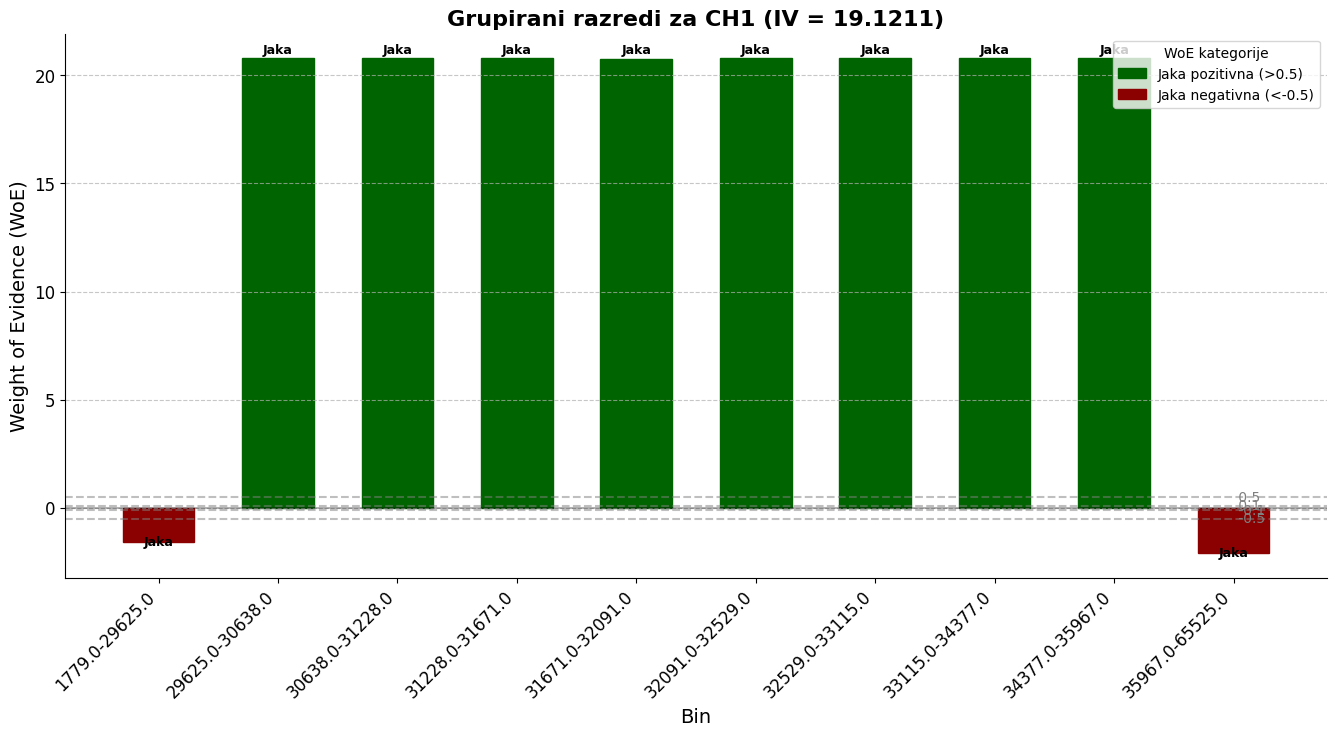

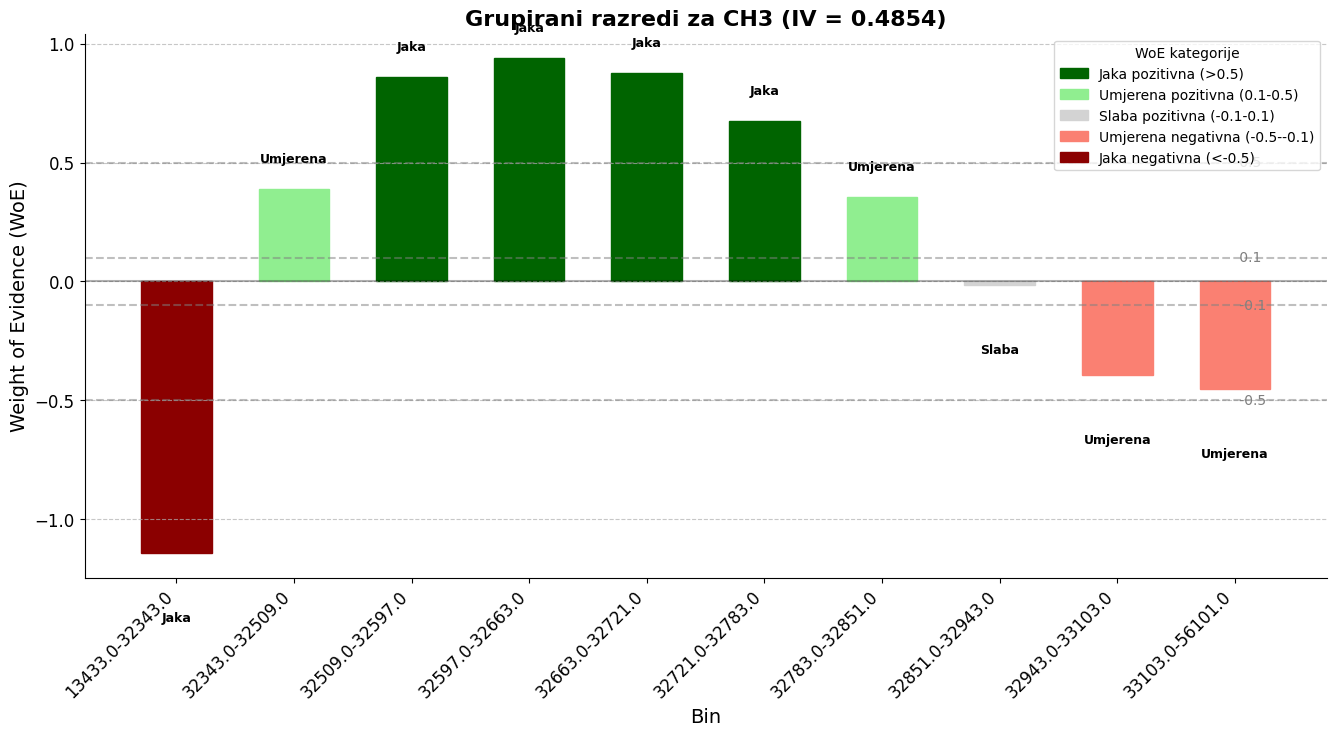

In [64]:

# Definiranje pragova za grupiranje WoE vrijednosti
woe_thresholds = {
    'strong_positive': 0.5,    # Jaka pozitivna povezanost s normalnim ECG
    'moderate_positive': 0.1,  # Umjerena pozitivna povezanost s normalnim ECG
    'neutral': -0.1,           # Neutralna zona
    'moderate_negative': -0.5, # Umjerena povezanost s abnormalnim ECG
    # Ispod -0.5: Jaka povezanost s abnormalnim ECG
}

# Funkcija za kategorizaciju WoE vrijednosti
def categorize_woe(woe_value):
    if woe_value > woe_thresholds['strong_positive']:
        return "Jaka pozitivna (>0.5)"
    elif woe_value > woe_thresholds['moderate_positive']:
        return "Umjerena pozitivna (0.1-0.5)"
    elif woe_value > woe_thresholds['neutral']:
        return "Slaba pozitivna (-0.1-0.1)"
    elif woe_value > woe_thresholds['moderate_negative']:
        return "Umjerena negativna (-0.5--0.1)"
    else:
        return "Jaka negativna (<-0.5)"

# Funkcija za određivanje boje na temelju WoE kategorije
def get_woe_color(woe_category):
    color_map = {
        "Jaka pozitivna (>0.5)": 'darkgreen',
        "Umjerena pozitivna (0.1-0.5)": 'lightgreen',
        "Slaba pozitivna (-0.1-0.1)": 'lightgray',
        "Umjerena negativna (-0.5--0.1)": 'salmon',
        "Jaka negativna (<-0.5)": 'darkred'
    }
    return color_map.get(woe_category, 'blue')

# Obrada najjačih varijabli (top 3 po IV vrijednosti)
top_vars = list(strong_iv_vars.keys())[:3]
print(f"Grupiranje razreda za top {len(top_vars)} varijable po IV vrijednosti:")

for var in top_vars:
    print(f"\nAnaliza varijable: {var} (IV = {strong_iv_vars[var]:.4f})")
    
    # Izračun WoE za varijablu
    num_unique = df[var].nunique()
    num_bins = min(10, max(2, num_unique // 10))
    
    woe_df, _ = calculate_woe_iv(df, var, 'abnormal_ecg', bins=num_bins, show_woe=False)
    
    if woe_df is not None:
        # Sortiranje po bin_min za bolji prikaz
        woe_df = woe_df.sort_values('bin_min')
        
        # Dodavanje kategorije WoE
        woe_df['woe_category'] = woe_df['woe'].apply(categorize_woe)
        
        # Kreiranje tablice s grupiranim razredima
        grouped_table = woe_df.groupby('woe_category').agg(
            broj_binova=('bin', 'count'),
            ukupno_uzoraka=('total', 'sum'),
            prosjecni_woe=('woe', 'mean'),
            min_woe=('woe', 'min'),
            max_woe=('woe', 'max')
        ).reset_index()
        
        # Sortiranje kategorija od najjače pozitivne do najjače negativne
        category_order = [
            "Jaka pozitivna (>0.5)", 
            "Umjerena pozitivna (0.1-0.5)", 
            "Slaba pozitivna (-0.1-0.1)", 
            "Umjerena negativna (-0.5--0.1)", 
            "Jaka negativna (<-0.5)"
        ]
        grouped_table['order'] = grouped_table['woe_category'].apply(lambda x: category_order.index(x))
        grouped_table = grouped_table.sort_values('order').drop('order', axis=1)
        
        # Ispis tablice
        print("\nGrupirani razredi po WoE kategorijama:")
        print(grouped_table.to_string(index=False))
        
        # Kreiranje grafa s grupiranim razredima
        plt.figure(figsize=(14, 8))
        
        # Kreiranje grafa s bojama prema WoE kategoriji
        bars = plt.bar(range(len(woe_df)), woe_df['woe'], width=0.6)
        
        # Bojanje stupaca prema WoE kategoriji
        for i, bar in enumerate(bars):
            bar.set_color(get_woe_color(woe_df['woe_category'].iloc[i]))
        
        plt.title(f"Grupirani razredi za {var} (IV = {strong_iv_vars[var]:.4f})", fontsize=16, fontweight='bold')
        plt.xlabel("Bin", fontsize=14)
        plt.ylabel("Weight of Evidence (WoE)", fontsize=14)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # Dodavanje horizontalnih linija za pragove
        for threshold_name, threshold_value in woe_thresholds.items():
            plt.axhline(y=threshold_value, color='gray', linestyle='--', alpha=0.5)
            plt.text(len(woe_df)-1, threshold_value, f' {threshold_value}', 
                    va='center', ha='left', fontsize=10, color='gray')
        
        # Postavljanje oznaka na x-osi
        if isinstance(woe_df["bin"].iloc[0], pd.Interval):
            bin_labels = [f"{row['bin_min']:.1f}-{row['bin_max']:.1f}" for _, row in woe_df.iterrows()]
        else:
            bin_labels = [str(val) for val in woe_df['bin']]
        
        plt.xticks(range(len(woe_df)), bin_labels, rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        
        # Dodavanje kategorije WoE iznad svakog stupca
        for i, bar in enumerate(bars):
            height = bar.get_height()
            y_pos = height + 0.1 if height >= 0 else height - 0.3
            
            # Skraćeni prikaz kategorije za graf
            category = woe_df['woe_category'].iloc[i]
            short_category = category.split(' ')[0]  # Uzimamo samo prvi dio (npr. "Jaka")
            
            plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                    short_category, ha='center', va='bottom', 
                    fontsize=9, fontweight='bold', color='black')
        
        # Dodavanje legende
        legend_elements = [plt.Rectangle((0,0), 1, 1, color=get_woe_color(cat), label=cat) 
                          for cat in category_order if cat in woe_df['woe_category'].values]
        plt.legend(handles=legend_elements, title="WoE kategorije", 
                  loc='upper right', fontsize=10)
        
        # Poboljšanje izgleda grafa
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # Povećanje razmaka za x-oznake
        plt.gcf().subplots_adjust(bottom=0.2)
        
        # Dodavanje margina oko grafa
        plt.tight_layout(pad=3.0)
        
        # Kreiranje tablice s vrijednostima binova i njihovim WoE kategorijama
        bin_table = woe_df[['bin_label', 'woe', 'woe_category', 'total', 'good', 'bad']].copy()
        bin_table['good_pct'] = (bin_table['good'] / bin_table['total'] * 100).round(2)
        bin_table['bad_pct'] = (bin_table['bad'] / bin_table['total'] * 100).round(2)
        
        # Ispis tablice s detaljima binova
        print("\nDetalji binova i njihove WoE kategorije:")
        print(bin_table[['bin_label', 'woe', 'woe_category', 'total', 'good_pct', 'bad_pct']].to_string(index=False))
        
        # Analiza grupiranih razreda
        print("\nAnaliza grupiranih razreda:")
        
        # Binovi s jakom pozitivnom WoE vrijednosti (visoka povezanost s normalnim ECG)
        strong_positive = bin_table[bin_table['woe_category'] == "Jaka pozitivna (>0.5)"]
        if not strong_positive.empty:
            print(f"- Razredi s jakom pozitivnom povezanosti (WoE > 0.5):")
            for _, row in strong_positive.iterrows():
                print(f"  * {row['bin_label']}: WoE = {row['woe']:.4f}, {row['good_pct']}% normalnih, {row['bad_pct']}% abnormalnih")
        
        # Binovi s jakom negativnom WoE vrijednosti (visoka povezanost s abnormalnim ECG)
        strong_negative = bin_table[bin_table['woe_category'] == "Jaka negativna (<-0.5)"]
        if not strong_negative.empty:
            print(f"- Razredi s jakom negativnom povezanosti (WoE < -0.5):")
            for _, row in strong_negative.iterrows():
                print(f"  * {row['bin_label']}: WoE = {row['woe']:.4f}, {row['good_pct']}% normalnih, {row['bad_pct']}% abnormalnih")
        
        # Zaključak za varijablu
        print("\nZaključak za varijablu:")
        
        # Broj binova po kategoriji
        category_counts = bin_table['woe_category'].value_counts()
        
        # Ukupan broj uzoraka po kategoriji
        category_samples = bin_table.groupby('woe_category')['total'].sum()
        
        # Postotak uzoraka po kategoriji
        total_samples = bin_table['total'].sum()
        category_percentages = (category_samples / total_samples * 100).round(2)
        
        # Ispis zaključka
        for category in category_order:
            if category in category_counts:
                count = category_counts[category]
                samples = category_samples[category]
                percentage = category_percentages[category]
                print(f"- {category}: {count} bin(ova), {samples} uzoraka ({percentage}% podataka)")
        
        # Preporuka za varijablu
        print("\nPreporuka za korištenje varijable:")
        
        # Ako postoje binovi s jakom pozitivnom ili negativnom WoE vrijednosti
        if not strong_positive.empty or not strong_negative.empty:
            print(f"- Varijabla {var} ima razrede s jakom prediktivnom moći.")
            
            if not strong_positive.empty:
                ranges = ", ".join([row['bin_label'] for _, row in strong_positive.iterrows()])
                print(f"  * Razredi {ranges} snažno predviđaju normalne ECG vrijednosti.")
            
            if not strong_negative.empty:
                ranges = ", ".join([row['bin_label'] for _, row in strong_negative.iterrows()])
                print(f"  * Razredi {ranges} snažno predviđaju abnormalne ECG vrijednosti.")
        else:
            print(f"- Varijabla {var} nema razrede s jakom prediktivnom moći.")
            print(f"  * Preporučuje se kombinirati ovu varijablu s drugim varijablama za bolje predviđanje.")

# Zaključak analize grupiranih razreda
print("\nZaključak analize grupiranih razreda:")
print("1. Grupiranje razreda po WoE vrijednosti omogućuje identifikaciju specifičnih raspona vrijednosti varijabli")
print("   koji imaju najveću prediktivnu moć za normalne ili abnormalne ECG vrijednosti.")
print("2. Razredi s jakom pozitivnom WoE vrijednosti (>0.5) snažno predviđaju normalne ECG vrijednosti.")
print("3. Razredi s jakom negativnom WoE vrijednosti (<-0.5) snažno predviđaju abnormalne ECG vrijednosti.")
print("4. Za najbolje rezultate predviđanja, fokusirati se na razrede s ekstremnim WoE vrijednostima.")

# Prikaz svih grafova
plt.show()

# Konačna analiza, preporuke i zaključak

Analizom podataka o srčanim signalima identificirali smo ključne varijable i obrasce koji predviđaju abnormalne ECG događaje.

ECG signal (CH1) pokazao se kao najjači prediktor s izuzetno visokom prediktivnom moći (IV=19.15). Vrijednosti između 29605 i 36743 gotovo savršeno predviđaju normalne ECG očitanja, dok vrijednosti izvan tog raspona snažno ukazuju na abnormalnosti.

Elektrodermalna aktivnost (CH2, IV=0.83) i varijabla CH8 (IV=0.52) također su se pokazale kao važni sekundarni prediktori. Kod CH2, srednje vrijednosti predviđaju normalne ECG vrijednosti, dok ekstremne vrijednosti ukazuju na abnormalnosti.

Grupiranjem razreda po WoE kriteriju identificirali smo specifične raspone vrijednosti s najvećom prediktivnom moći. Ovo grupiranje omogućuje preciznije prepoznavanje rizičnih obrazaca i stvaranje učinkovitijih pravila za klasifikaciju abnormalnih srčanih događaja.

Za optimalne rezultate, preporučuje se praćenje kombinacije ovih signala, s posebnim naglaskom na ekstremne vrijednosti ECG-a uz istovremene abnormalnosti u drugim fiziološkim signalima.